In [812]:
#The data set belongs to a leading online E-Commerce company who wants to know the customers 
#who are going to churn, so accordingly they can approach them and offer them some promos.
#It can cost anywhere between 5 and 25 times more to attract new customers than it does to retain existing ones. 
#Statistics show an increase in customer retention by 5% can lead to a company’s profits growing by 25% to around
#95% over a period of time. So I will build ML models to predict customer churn using data collected from e-commerce.

In [813]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import time
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import accuracy_score, roc_auc_score,  plot_confusion_matrix, roc_curve, classification_report,average_precision_score,brier_score_loss,f1_score,confusion_matrix,matthews_corrcoef,plot_precision_recall_curve,plot_roc_curve
from sklearn import metrics
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_classif

In [814]:
#read the dataset
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [815]:
#E Comm	CustomerID	Unique customer ID
#E Comm	Churn	Churn Flag
#E Comm	Tenure	Tenure of customer in organization
#E Comm	PreferredLoginDevice	Preferred login device of customer
#E Comm	CityTier	City tier
#E Comm	WarehouseToHome	Distance in between warehouse to home of customer
#E Comm	PreferredPaymentMode	Preferred payment method of customer
#E Comm	Gender	Gender of customer
#E Comm	HourSpendOnApp	Number of hours spend on mobile application or website
#E Comm	NumberOfDeviceRegistered	Total number of deceives is registered on particular customer
#E Comm	PreferedOrderCat	Preferred order category of customer in last month
#E Comm	SatisfactionScore	Satisfactory score of customer on service
#E Comm	MaritalStatus	Marital status of customer
#E Comm	NumberOfAddress	Total number of addresses added on particular customer
#E Comm	Complain	Any complaint has been raised in last month
#E Comm	OrderAmountHikeFromlastYear	Percentage increases in order from last year
#E Comm	CouponUsed	Total number of coupon has been used in last month
#E Comm	OrderCount	Total number of orders has been places in last month
#E Comm	DaySinceLastOrder	Day Since last order by customer
#E Comm	CashbackAmount	Average cashback in last month

In [816]:
#view some basic statistical details
c_list=['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress',
        'Complain','OrderAmountHikeFromlastYear','CouponUsed','DaySinceLastOrder','OrderCount','CashbackAmount']
df[c_list].describe()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5366.000000      5379.000000     5375.000000               5630.000000   
mean     10.189899        15.639896        2.931535                  3.688988   
std       8.557241         8.531475        0.721926                  1.023999   
min       0.000000         5.000000        0.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      16.000000        20.000000        3.000000                  4.000000   
max      61.000000       127.000000        5.000000                  6.000000   

       SatisfactionScore  NumberOfAddress     Complain  \
count        5630.000000      5630.000000  5630.000000   
mean            3.066785         4.214032     0.284902   
std             1.380194         2.583586     0.451408   
min             1.000000         1.000000     0.000000   
25%             2.000000         2.000000     0.000000   
50%             3.000000         3.000000     0.000000   
75%             4.000000         6.000000     1.000000   
max             5.000000        22.000000     1.000000   

       OrderAmountHikeFromlastYear   CouponUsed  DaySinceLastOrder  \
count                  5365.000000  5374.000000        5323.000000   
mean                     15.707922     1.751023           4.543491   
std                       3.675485     1.894621           3.654433   
min                      11.000000     0.000000           0.000000   
25%                      13.000000     1.000000           2.000000   
50%                      15.000000     1.000000           3.000000   
75%                      18.000000     2.000000           7.000000   
max                      26.000000    16.000000          46.000000   

        OrderCount  CashbackAmount  
count  5372.000000     5630.000000  
mean      3.008004      177.223030  
std       2.939680       49.207036  
min       1.000000        0.000000  
25%       1.000000      145.770000  
50%       2.000000      163.280000  
75%       3.000000      196.392500  
max      16.000000      324.990000

In [817]:
#get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [818]:
#check shape
df.shape

(5630, 20)

In [819]:
#check duplicates
df.duplicated().sum()

0

In [820]:
#check null values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<AxesSubplot:>

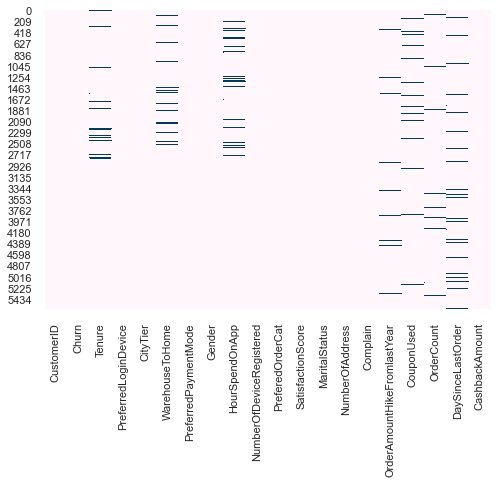

In [821]:
sns.set(font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [822]:
#percent of missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

DaySinceLastOrder              0.054529
OrderAmountHikeFromlastYear    0.047069
Tenure                         0.046892
OrderCount                     0.045826
CouponUsed                     0.045471
HourSpendOnApp                 0.045293
WarehouseToHome                0.044583
CashbackAmount                 0.000000
PreferredPaymentMode           0.000000
Churn                          0.000000
PreferredLoginDevice           0.000000
CityTier                       0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
CustomerID                     0.000000
dtype: float64

In [823]:
df['PreferredLoginDevice'].value_counts()#MobilePhone preferred

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [824]:
df['PreferredPaymentMode'].value_counts()#DebitCard preferred

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [825]:
df['PreferedOrderCat'].value_counts()#Laptop&Acc most bought

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [826]:
df['Churn'].value_counts()#imbalanced datatset can create problems in the classification task.

0    4682
1     948
Name: Churn, dtype: int64

In [827]:
# Percentage of customer churn
round((df['Churn'][df['Churn']==1].count()*100/df['Churn'].count()),2)

16.84

In [828]:
#feature engineering  -  designing artificial features
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [829]:
#CustomerID doesn't give any signal so we drop it
(df['CustomerID'].value_counts().values>1).any()

False

In [830]:
#drop CustomerID because doesn't offer any information
df.drop(columns=['CustomerID'],inplace=True)

In [831]:
#remove outliers with IQR method
def remove_outliers(df,cols):
    for item in cols:
        sorted(item)
        q25,q75=np.percentile(df[item],[25,75])
        IQR=q75-q25
        lower=q25-1.5*IQR
        upper=q75+1.5*IQR
        df.drop((df[(df[item]<lower) | (df[item]>upper)]).index , axis=0,inplace=True)

In [832]:
def cap_floor_outliers(df,cols):
    for i,col in enumerate(cols):
        sorted(col)
        q25,q75=np.percentile(df[col],[25,75])
        iqr=q75-q25
        lower=q25-1.5*iqr
        upper=q75+1.5*iqr
        df.loc[df[col]<lower,col] = np.percentile(df[col], 10)
        df.loc[df[col]>upper,col] = np.percentile(df[col], 90)

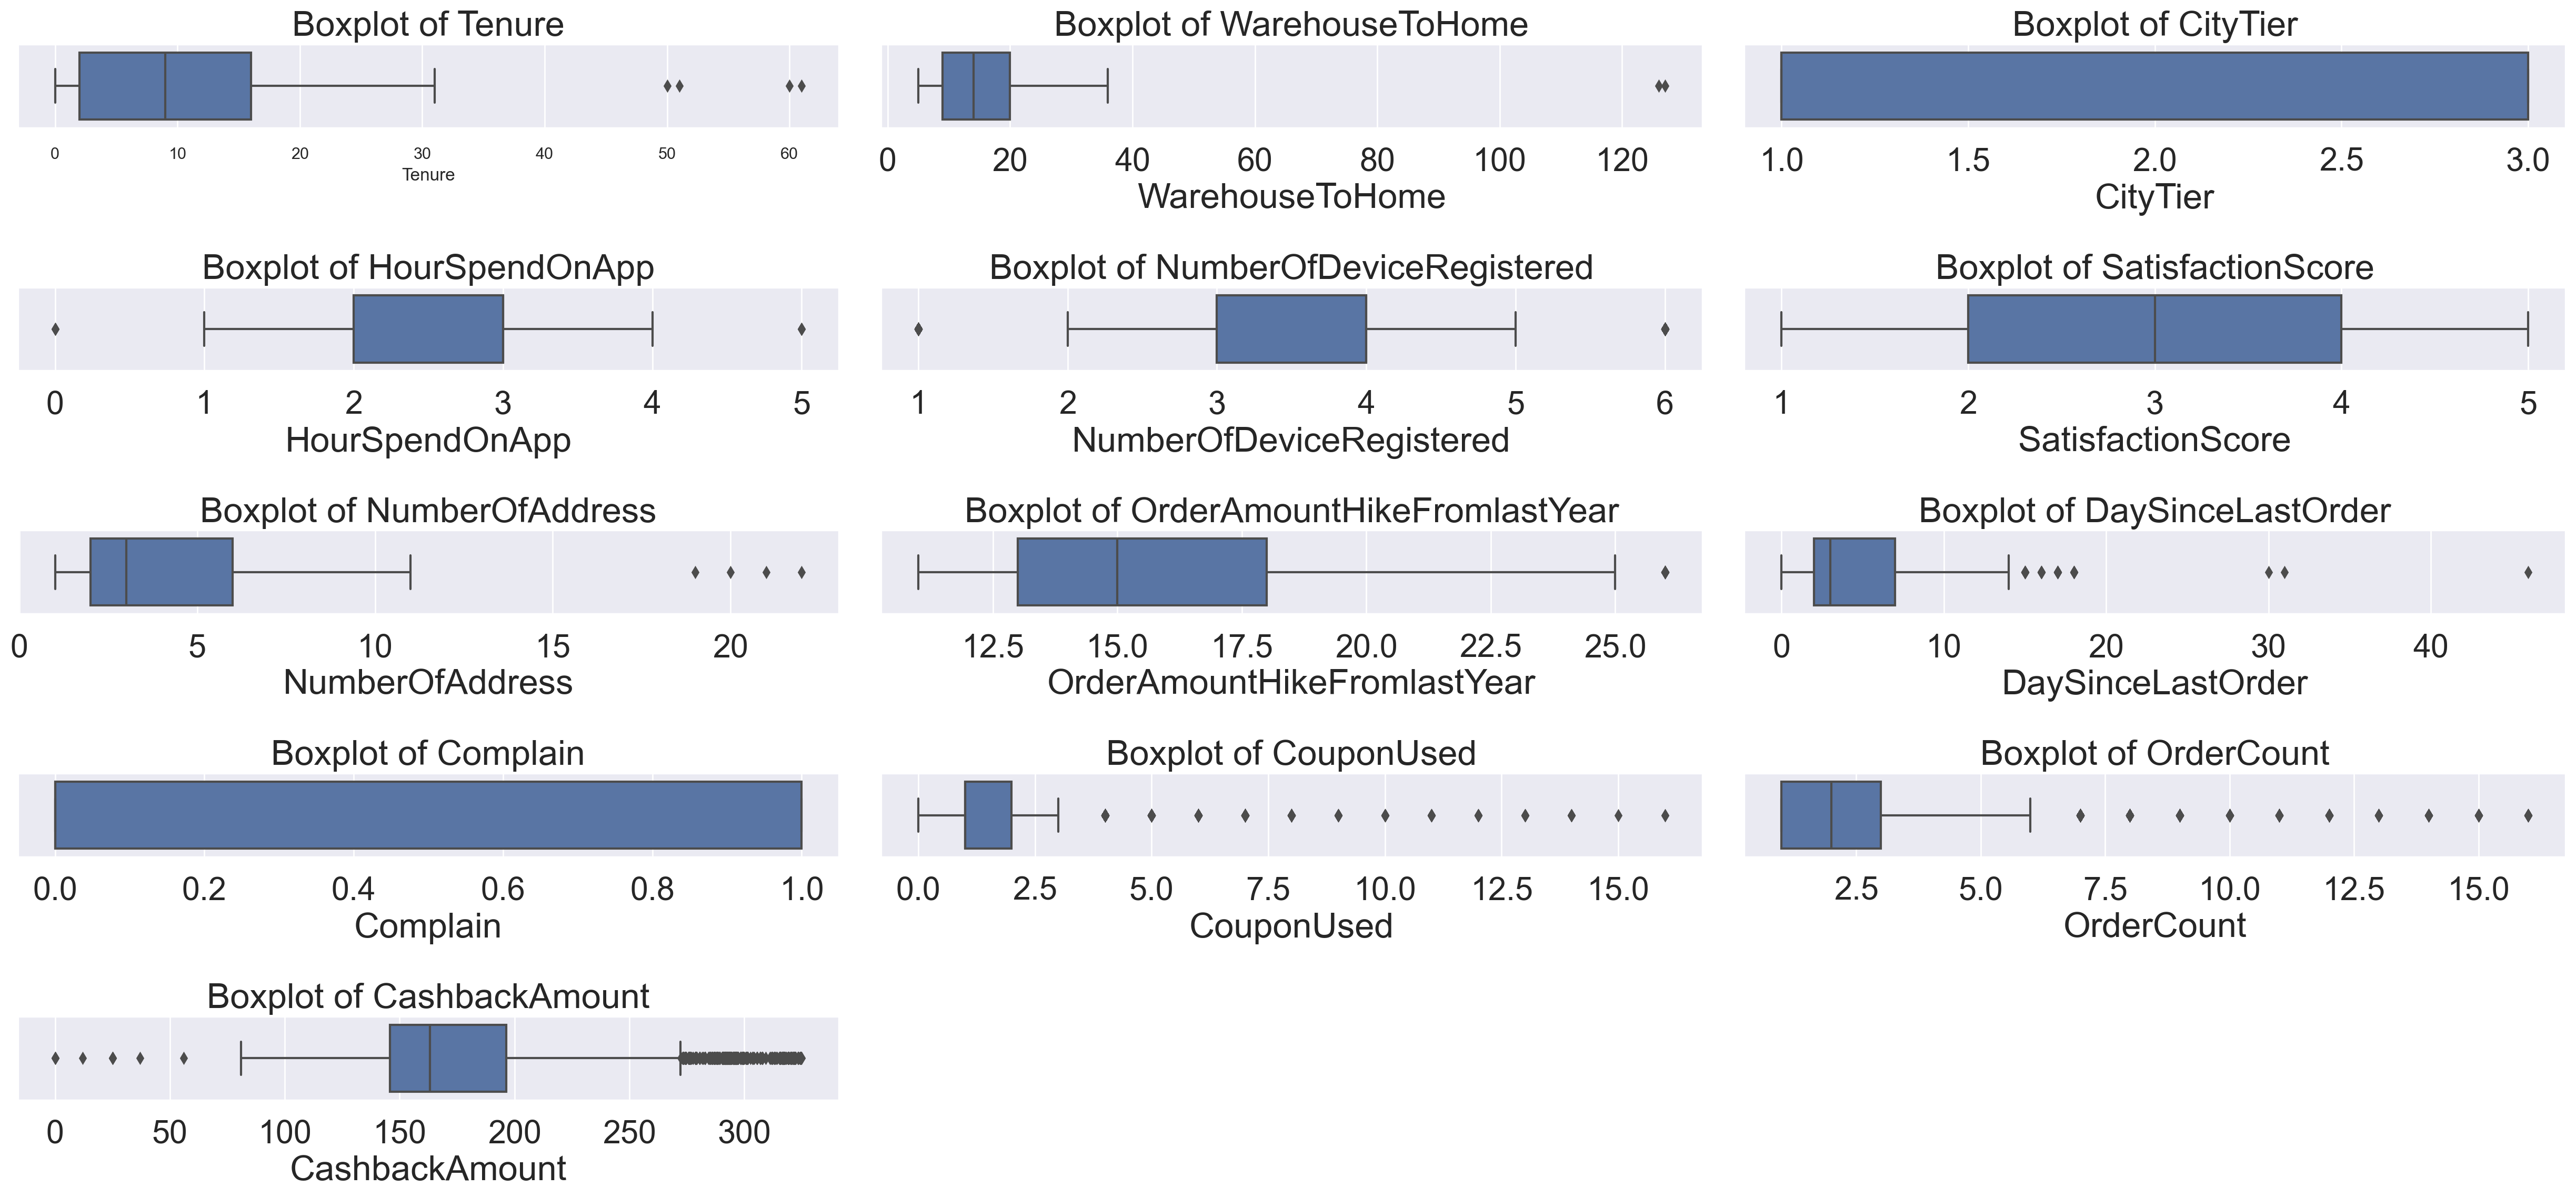

In [833]:
#visualize outliers with boxplot
i=0
col_list=['Tenure','WarehouseToHome','CityTier' ,'HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','DaySinceLastOrder','Complain','CouponUsed','OrderCount','CashbackAmount']
plt.figure(figsize=(25,18),dpi=200)
for i,item in enumerate(col_list):
    ax=plt.subplot(8,3,i+1)
    sns.set(font_scale = 2)
    sns.boxplot(data=df,x=item,ax=ax)
    ax.set_title(f'Boxplot of {item}')
    i=i+1
plt.tight_layout()

In [834]:
sel=df.select_dtypes(include='number').columns
#remove_outliers(df,sel)
cap_floor_outliers(df,sel)

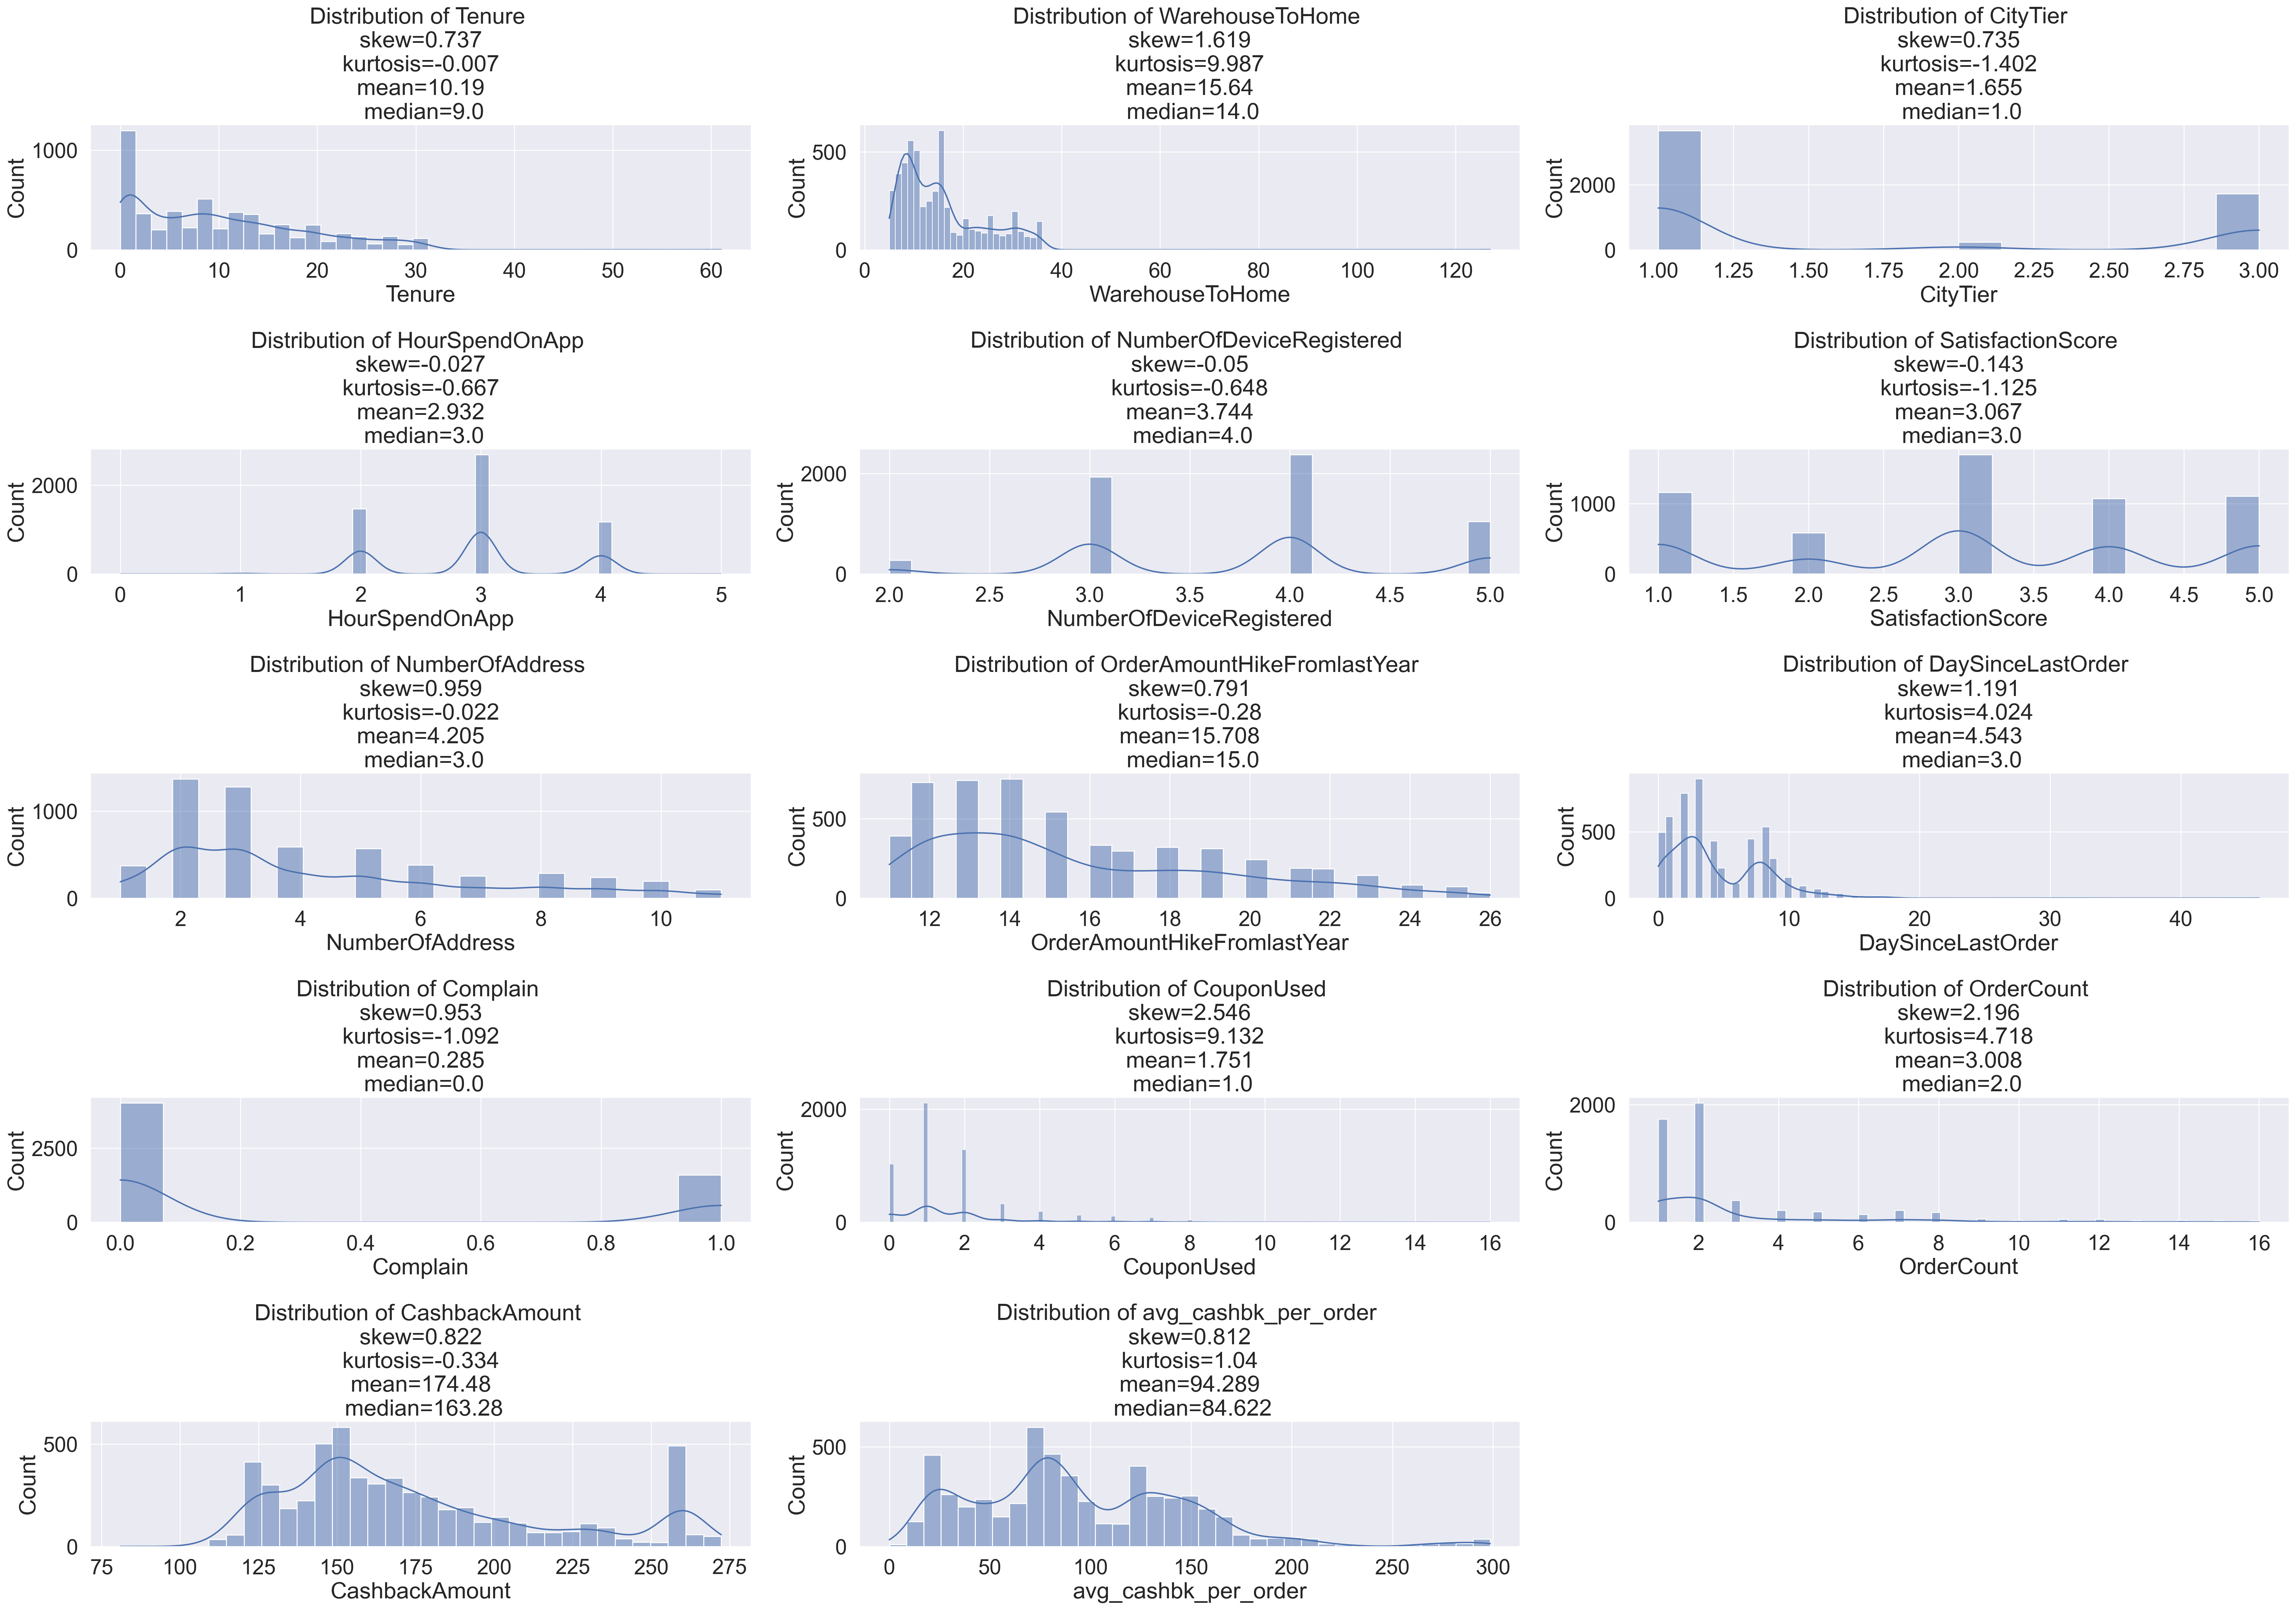

In [835]:
#univariate analysis for the numerical features
#histogram/skew(If the skewness is between -0.5 and 0.5, the data are fairly symmetrical)/kurtosis(Kurtosis=3 looks more close to a normal distribution)/mean/median

col_list=['Tenure','WarehouseToHome','CityTier', 'HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','DaySinceLastOrder','Complain','CouponUsed','OrderCount','CashbackAmount','avg_cashbk_per_order']
plt.figure(figsize=(34,24),dpi=200)
for j,col in enumerate(col_list):
    plt.subplot(5,3,j+1)
    sns.set(font_scale = 2)
    sns.histplot(data=df,x=df[col],kde=True)
    skew=np.round(df[col].skew(),3)
    kurtosis=np.round(df[col].kurtosis(),3)
    mean=np.round(df[col].mean(),3)
    median=np.round(df[col].median(),3)
    plt.title(f'Distribution of {col} \n skew={skew} \n kurtosis={kurtosis} \n mean={mean} \n median={median}')
    plt.tight_layout()
plt.show()

In [836]:
#visualize numerical features
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7,6),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=8)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=8)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=8, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

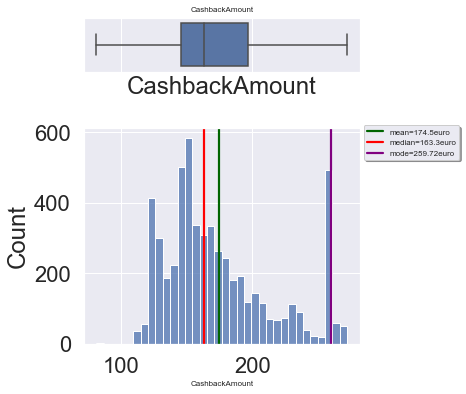

In [837]:
num_plot(df,'CashbackAmount','CashbackAmount','euro')

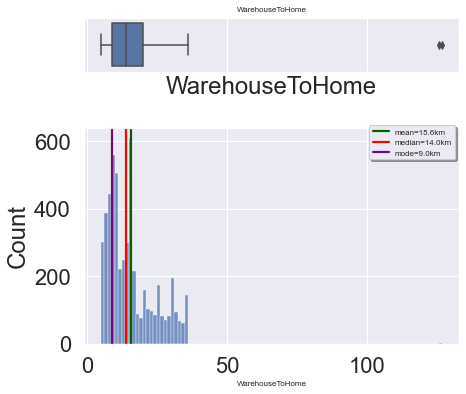

In [838]:
num_plot(df,'WarehouseToHome','WarehouseToHome','km')

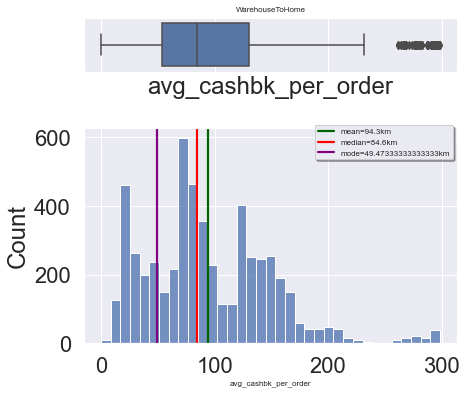

In [839]:
num_plot(df,'avg_cashbk_per_order','WarehouseToHome','km')

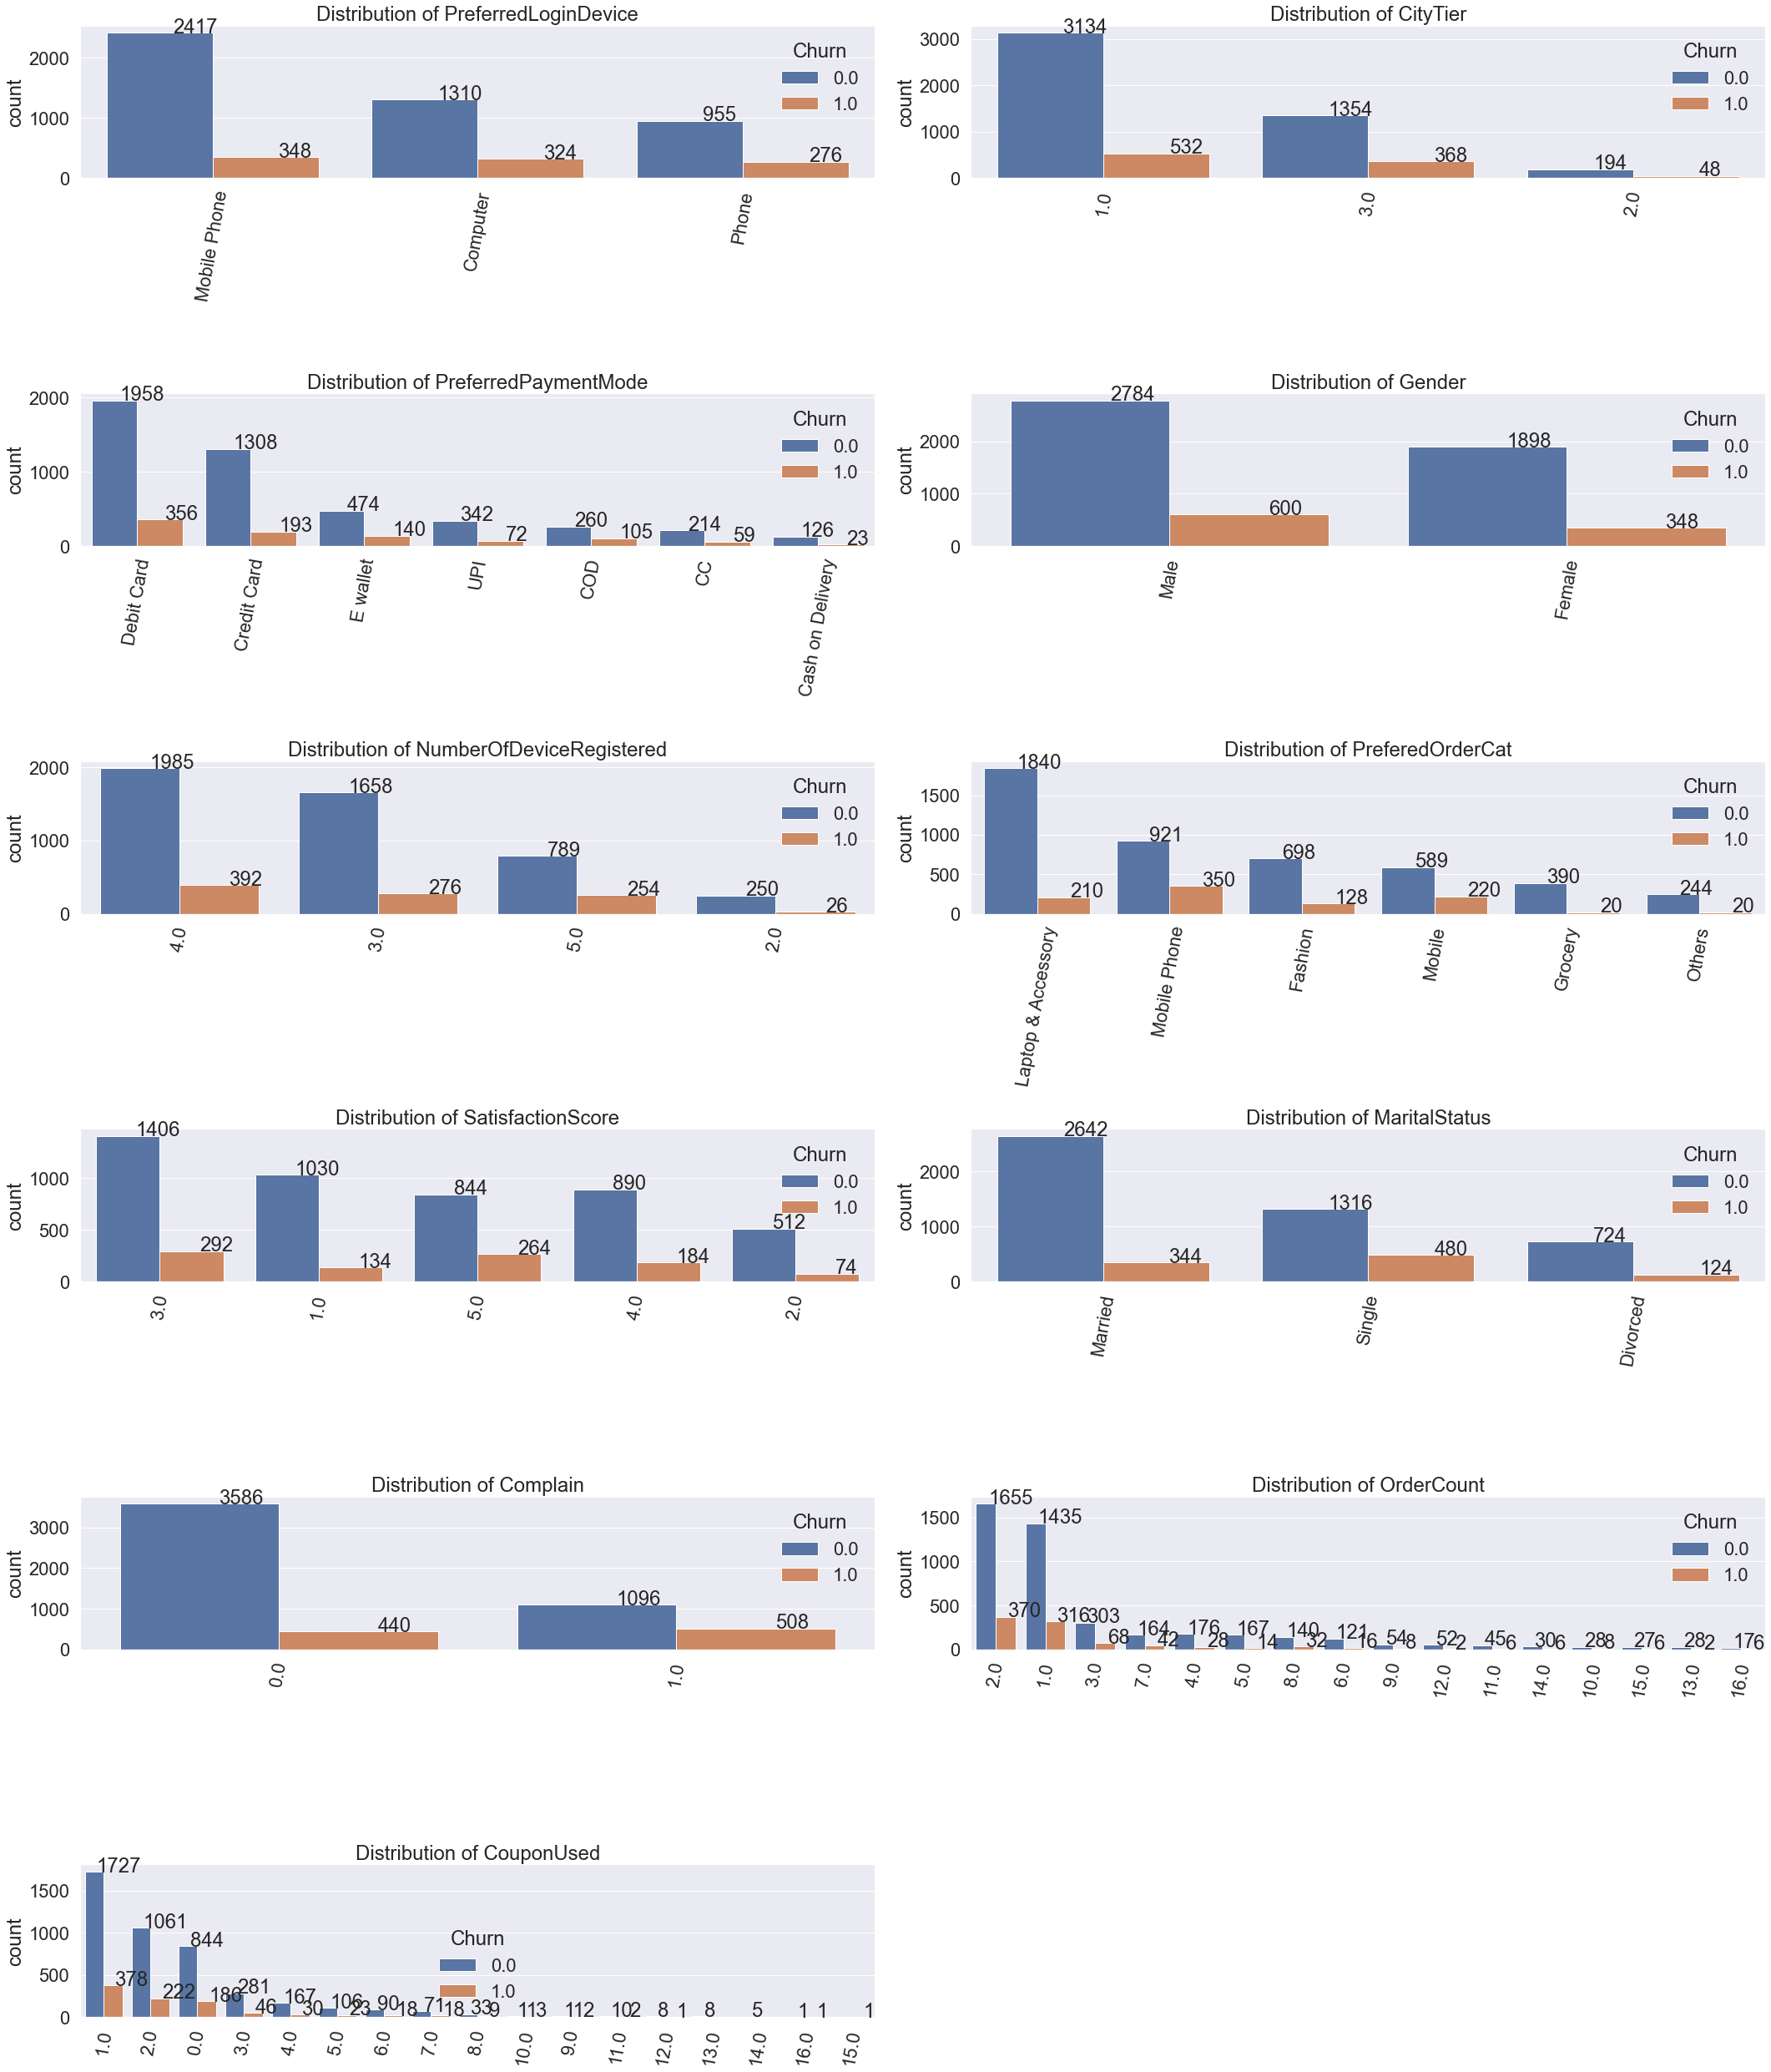

In [840]:
#plotting categorical variables
col_l=['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain','OrderCount','CouponUsed']
plt.figure(figsize=(30,35))
for i,item in enumerate(col_l):
    ax = plt.subplot(6,2,i+1)
    sns.set(font_scale = 2)
    sns.countplot(data=df,x=item,hue='Churn',order=df[item].value_counts().index)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xticks(rotation=80);
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {item}')
    plt.tight_layout()

plt.show()

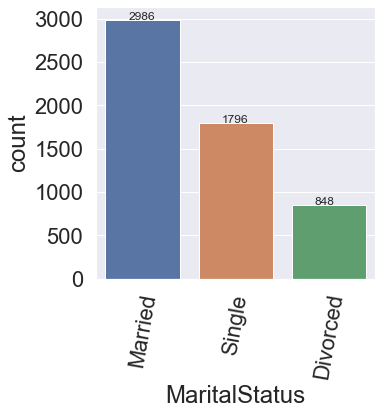

In [841]:
#wich marital status is the most frequent
fig,ax=plt.subplots(figsize=(5,5))
sns.set(font_scale=1)
ax=sns.countplot(data=df,x='MaritalStatus',order=df['MaritalStatus'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=80);

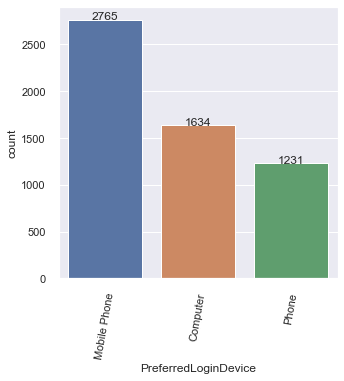

In [842]:
#wich device is the most frequent
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.countplot(data=df,x='PreferredLoginDevice',order=df['PreferredLoginDevice'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=80);

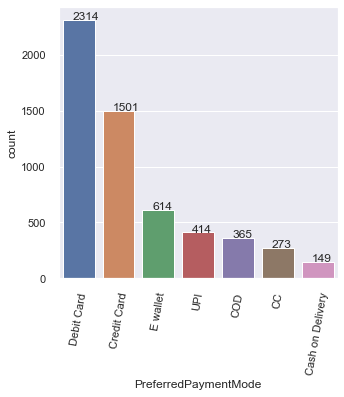

In [843]:
#wich payment mode is the most frequent
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.countplot(data=df,x='PreferredPaymentMode',order=df['PreferredPaymentMode'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=80);

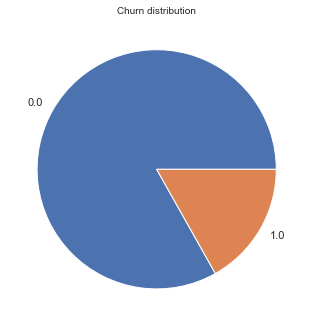

In [844]:
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].value_counts().index)
plt.title("Churn distribution", fontsize=10)
plt.show()

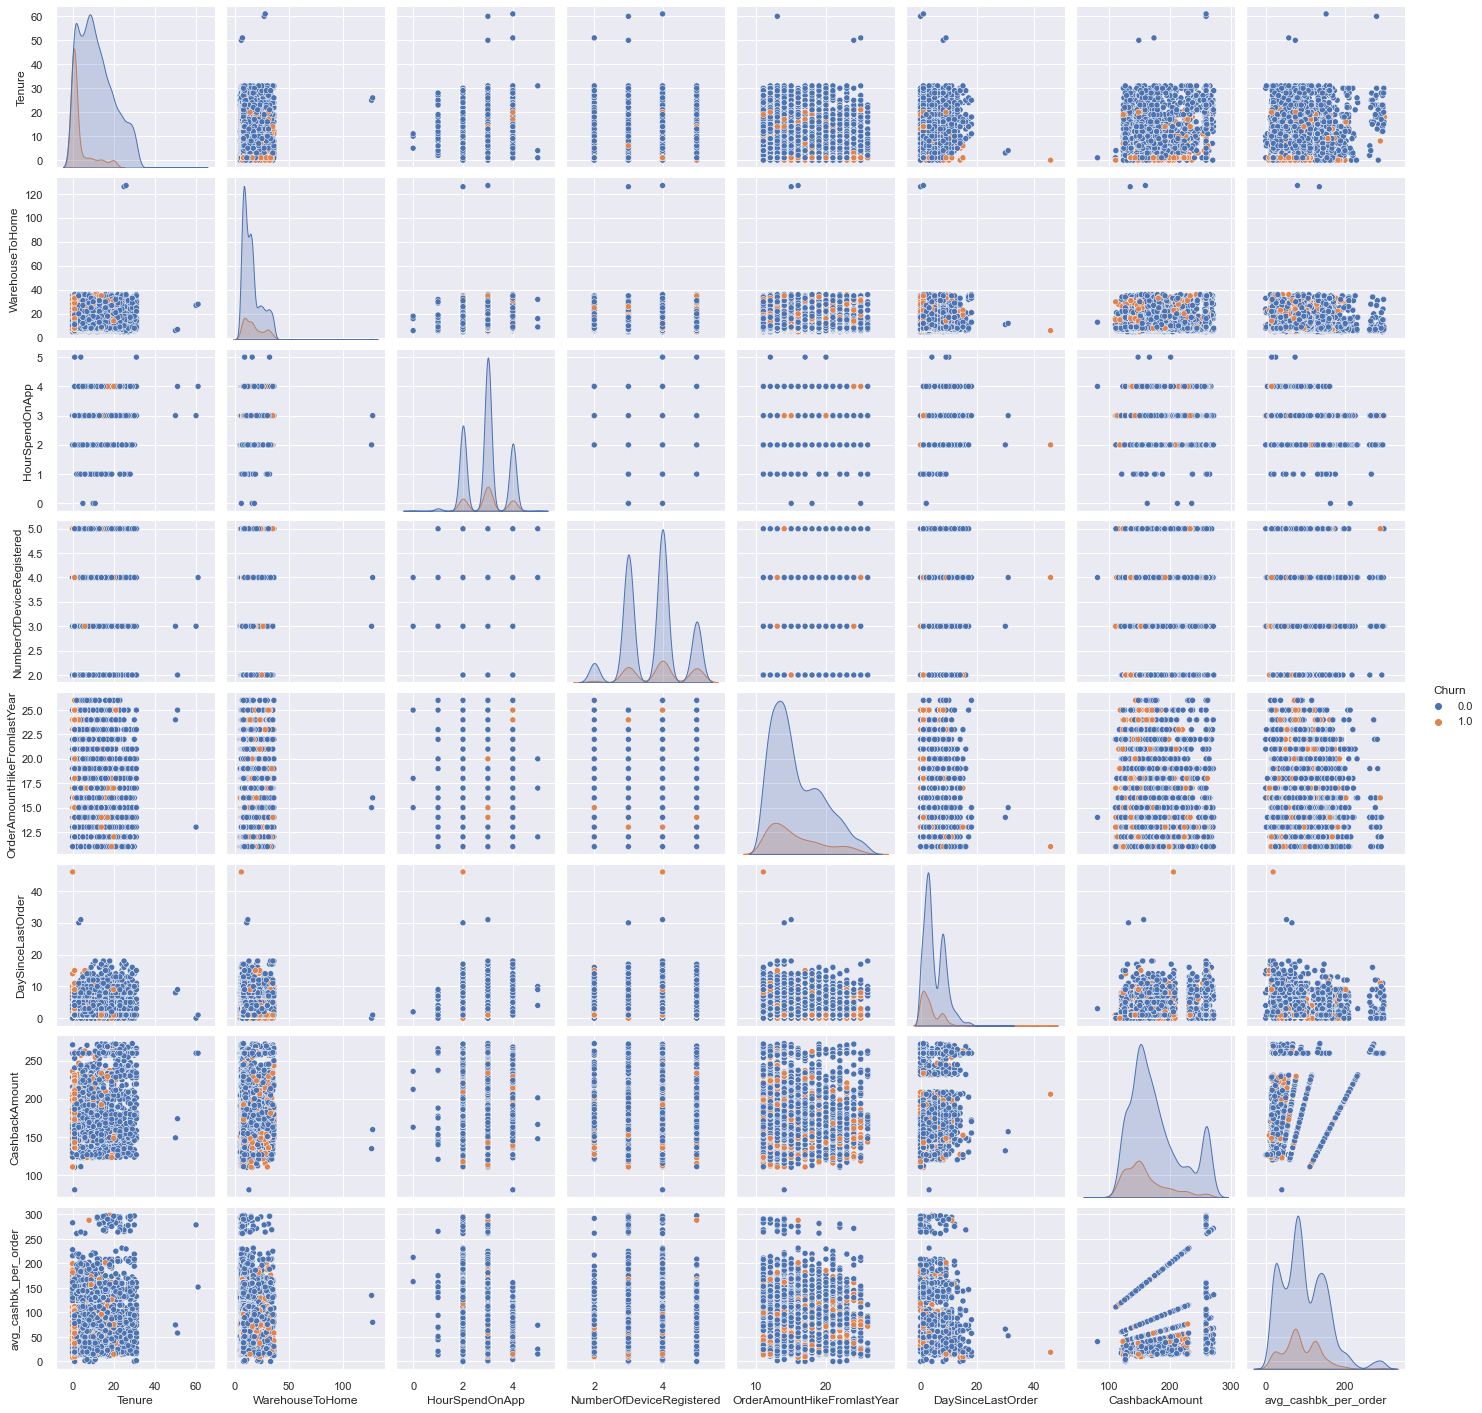

In [845]:
c_list=['Tenure','WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered',
        'OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','avg_cashbk_per_order']
cols_to_plot = c_list + ['Churn'] 
sns.set(font_scale=1)
sns.pairplot(df[cols_to_plot],hue='Churn')

In [846]:
#create pipelines for data processing.
#Numerical features are imputed and scaled.Categorical features are imputed and encoded.
num_pipeline=Pipeline([('imputer',KNNImputer(missing_values=np.nan,n_neighbors=3)),('scale',MinMaxScaler())])
cat_pipeline=Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(drop='first'))])

In [847]:
#numarical features used by predictive model
num_cols=df.drop('Churn',axis=1).select_dtypes(include='number').columns
num_cols

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order'],
      dtype='object')

In [848]:
#categorical features used by the predictive model
cat_cols=df.select_dtypes(exclude='number').columns
cat_cols

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [849]:
#create and apply separate transformers for numerical and categorical data
preprocessed=ColumnTransformer(transformers=[('num_transf',num_pipeline,num_cols),('cat_transf',cat_pipeline,cat_cols)])
preprocessed.fit(df.drop('Churn',axis=1))

ColumnTransformer(transformers=[('num_transf',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('scale', MinMaxScaler())]),
                                 Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order'],
      dtype='object')),
                                ('cat_transf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object'))])

In [850]:
categorical_col_names=preprocessed.named_transformers_['cat_transf']['ohe'].get_feature_names_out(cat_cols)
numerical_col_names=preprocessed.named_transformers_['num_transf']['scale'].get_feature_names_out(num_cols)

In [851]:
df_preprocessed=pd.DataFrame(data=preprocessed.transform(df.drop('Churn',axis=1)),columns=np.append(numerical_col_names,categorical_col_names))
df_preprocessed.head()

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0  0.065574       1.0         0.008197             0.6   
1  0.273224       0.0         0.024590             0.6   
2  0.071038       0.0         0.204918             0.4   
3  0.000000       1.0         0.081967             0.4   
4  0.000000       0.0         0.057377             0.4   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                  0.333333               0.25              0.8       1.0   
1                  0.666667               0.50              0.6       1.0   
2                  0.666667               0.50              0.5       1.0   
3                  0.666667               1.00              0.7       0.0   
4                  0.333333               1.00              0.2       0.0   

   OrderAmountHikeFromlastYear  CouponUsed  ...  \
0                     0.000000      0.0625  ...   
1                     0.266667      0.0000  ...   
2                     0.200000      0.0000  ...   
3                     0.800000      0.0000  ...   
4                     0.000000      0.0625  ...   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                            0.0                       0.0          0.0   
1                            0.0                       1.0          1.0   
2                            0.0                       0.0          1.0   
3                            0.0                       0.0          1.0   
4                            0.0                       0.0          1.0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                       0.0                                  1.0   
1                       0.0                                  0.0   
2                       0.0                                  0.0   
3                       0.0                                  1.0   
4                       0.0                                  0.0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                      0.0                            0.0   
1                      1.0                            0.0   
2                      1.0                            0.0   
3                      0.0                            0.0   
4                      1.0                            0.0   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                      0.0                    0.0                   1.0  
1                      0.0                    0.0                   1.0  
2                      0.0                    0.0                   1.0  
3                      0.0                    0.0                   1.0  
4                      0.0                    0.0                   1.0  

[5 rows x 30 columns]

<AxesSubplot:>

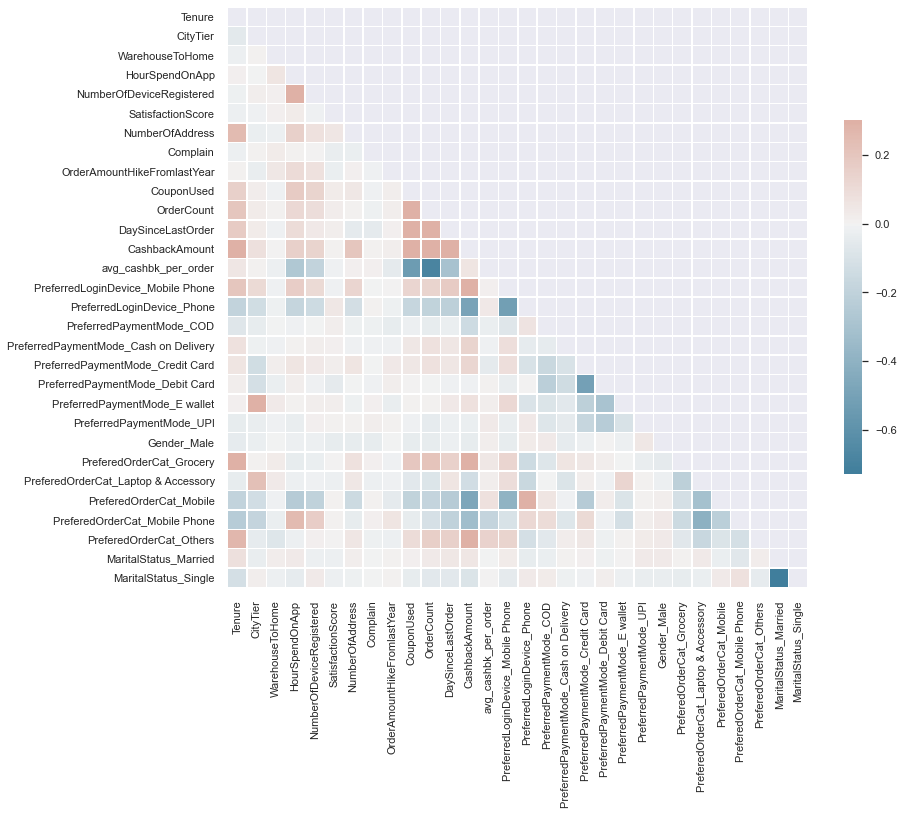

In [852]:
#correlation matrix
corr=df_preprocessed.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(13,13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [853]:
def get_feature_correlation(df,top_n=None,corr_method='spearman'):
    corr_matrix_abs=df.corr(method=corr_method).abs()
    corr_matrix_us=corr_matrix_abs.unstack()
    sorted_correlated_features=corr_matrix_us.sort_values(kind="quicksort", ascending=False).reset_index()
    sorted_correlated_features=sorted_correlated_features[sorted_correlated_features['level_0']!=sorted_correlated_features['level_1']]
    sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

In [854]:
get_feature_correlation(df_preprocessed)

Feature 1                      Feature 2  \
30                          OrderCount           avg_cashbk_per_order   
32               MaritalStatus_Married           MaritalStatus_Single   
34                          CouponUsed                     OrderCount   
36                          CouponUsed           avg_cashbk_per_order   
38                      CashbackAmount     PreferredLoginDevice_Phone   
..                                 ...                            ...   
888  PreferredLoginDevice_Mobile Phone                WarehouseToHome   
890  PreferredLoginDevice_Mobile Phone                       Complain   
892                  SatisfactionScore                     OrderCount   
894                  SatisfactionScore        PreferedOrderCat_Others   
896              MaritalStatus_Married  PreferredPaymentMode_E wallet   

     Correlation (abs)  
30            0.904059  
32            0.727346  
34            0.701989  
36            0.628496  
38            0.604757  
..                 ...  
888           0.001383  
890           0.001381  
892           0.001218  
894           0.000581  
896           0.000401  

[434 rows x 3 columns]

In [855]:
d={}
# detailed analisys 
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_churned'})
    d.pop('Churn', None)

In [856]:
for i in df.drop('Churn',axis=1).columns:
    print(i)
    print(d[i])
    print()

Tenure
    Tenure  Customers_churned  Total_Customers  perc_churned
0      0.0              272.0              508         53.54
1      1.0              349.0              690         50.58
2      2.0               14.0              167          8.38
3      3.0               18.0              195          9.23
4      4.0               20.0              203          9.85
5      5.0               16.0              204          7.84
6      6.0                8.0              183          4.37
7      7.0               16.0              221          7.24
8      8.0               16.0              263          6.08
9      9.0               12.0              247          4.86
10    10.0               14.0              213          6.57
11    11.0               10.0              194          5.15
12    12.0                7.0              182          3.85
13    13.0               13.0              181          7.18
14    14.0               14.0              176          7.95
15    15.0       

In [857]:
#Feature selector that removes all low-variance features. 
vt = VarianceThreshold(threshold=0.0)
_ = vt.fit(df_preprocessed)
mask = vt.get_support()

In [858]:
mask#keep all columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

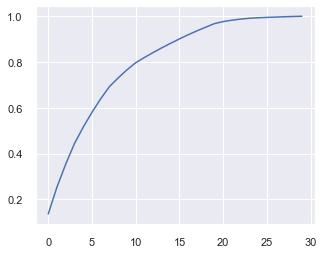

In [859]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit(df_preprocessed)
plt.figure(figsize=(5,4))
plt.plot(range(0,30),np.cumsum(X_pca.explained_variance_ratio_))
plt.grid(True)

In [860]:
pca=PCA(n_components=0.95)
X_pca=pca.fit(df_preprocessed)

In [861]:
X_new=X_pca.fit_transform(df_preprocessed)

In [862]:
X_pca.n_components_#we only need 19 components to explain 95% of the variance

19

In [863]:
def find_best_model(X,y):
   
    algos={
        'decision_tree':{
            'model': DecisionTreeClassifier(),
            'params':{
                'max_depth':[5,6,7],
                'min_samples_split':[5,6]
                     }
        },
         'knn':{
            'model': KNeighborsClassifier(),
            'params':{
                'n_neighbors':[5,6,7]
             }
            
        },
        'svc':{
            'model':SVC(),
            'params':{
                'C':[0.1,0.2,1]
            }
        
        },
        'RFC':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[70,80]
                
            }
        },
        'AdaC':{
            'model':AdaBoostClassifier(),
            'params':{
                 'n_estimators':[70,80]
            }
            
        },
        'GrBC':{
            'model':GradientBoostingClassifier(),
            'params':{
                'n_estimators':[70,80]
            }
        },
        'XGBoost':{
            'model':XGBClassifier(),
            'params':{
                'learning_rate':[0.001,0.01,0.1]
            }
        },
        'NN':{
            'model': MLPClassifier(),
            'params':{
                'hidden_layer_sizes':(10,10)
            }
        }
        
            
       
     }
    
    scores=[]
    cv=StratifiedKFold(n_splits=10,shuffle=True)
    for name,config in algos.items():
        gs=GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv)
        gs.fit(X,y)
        scores.append({
            'model':name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
            
        })
    return pd.DataFrame(scores)

In [864]:
X=df_preprocessed
y=df['Churn']

In [865]:
model_data={'type':['Strattified','Oversampling','Undesampling','Smote','TomekLink','SmoteTomek','Class weights'],
           'accuracy':[],
            'fpr':[],
            'fnr':[],
            'spec':[],
            'recall':[],
            'prec':[],
            'npv':[],
            'mcc':[],
            'f1_score':[],
            'roc_auc':[],
            'pr_auc':[],
            'brier_score':[],
            'time_taken':[]
           }

In [866]:
# Deal with imbalanced data using stratified splitting of the data
# 1.Stratified splitting to ensures the training and test sets have the same proportion of the feature of interest
#as in the original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify=y, test_size = 0.3, random_state = 42)

In [867]:
df_result=find_best_model(X_train,y_train)

In [868]:
pd.set_option('display.max_colwidth', None)
df_result.sort_values(by='best_score',ascending=False)

model  best_score                               best_params
3            RFC    0.915755                      {'n_estimators': 70}
6        XGBoost    0.907636                    {'learning_rate': 0.1}
5           GrBC    0.874148                      {'n_estimators': 80}
2            svc    0.869577                                  {'C': 1}
7             NN    0.864252                {'hidden_layer_sizes': 10}
0  decision_tree    0.862471  {'max_depth': 7, 'min_samples_split': 5}
1            knn    0.860950                        {'n_neighbors': 5}
4           AdaC    0.859169                      {'n_estimators': 70}

In [869]:
#hyperparam tuninng with optuna for the best selected model -RFC
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_new,y,scoring='f1')
    f1=score.mean()
    return f1

In [870]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-28 22:36:15,243] A new study created in memory with name: no-name-a9c6d46b-edf0-4d13-bec7-ba29f02e7f3e
[I 2023-05-28 22:36:22,768] Trial 0 finished with value: 0.5756498867077063 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.5756498867077063.
[I 2023-05-28 22:36:27,786] Trial 1 finished with value: 0.10858814245477395 and parameters: {'n_estimators': 106, 'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5756498867077063.
[I 2023-05-28 22:36:32,931] Trial 2 finished with value: 0.22793125920550655 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5756498867077063.
[I 2023-05-28 22:36:40,510] Trial 3 finished with value: 0.421

In [871]:
study.best_trial.value

0.6253062143504018

In [872]:
study.best_trial.params

{'n_estimators': 77,
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'log2'}

In [873]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    roc_auc = round(roc_auc_score(y_test, y_pred),3) 
    pr_auc=round(average_precision_score(y_test,y_pred),3)
    time_taken = round(time.time()-t0,3)
    tmax=confusion_matrix(y_test,y_pred)
    tp=tmax[0][0]
    fp=tmax[0][1]
    fn=tmax[1][0]
    tn=tmax[1][1]
    #false positive rate-type 1 errror
    fpr=round(fp/(fp+tn),3)
    #false negative rate
    fnr=round(fn/(tp+fn),3)
    #specificity(true negative rate)
    spec=round(tn/(tn+fp),3)
    #recall/sensitivity/true positive rate
    recall=round(tp/(tp+fn),3)
    #precision/positive predictive value
    prec=round(tp/(tp+fp),3)
    #negative predicted value
    npv=round(tn/(tn+fn),3)
    #mathews corr coeff
    mcc=round(matthews_corrcoef(y_test,y_pred),3)
    #f1_score
    f1_sc=round(metrics.f1_score(y_test,y_pred),3)
    probs=model.predict_proba(X_test)
    brier_score=round(brier_score_loss(y_test,probs[:,1]),3)
    print("Accuracy = {}".format(accuracy))
    print("FPR = {}".format(fpr))
    print("FNR = {}".format(fnr))
    print("Specificity = {}".format(spec))
    print("Recall = {}".format(recall))
    print("Precision = {}".format(prec))
    print("NPV = {}".format(npv))
    print("MCC = {}".format(mcc))
    print("F1_score = {}".format(f1_sc))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("PR Area under Curve = {}".format(pr_auc))
    print("Brier score = {}".format(brier_score))
    print("Time taken = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    #probs = model.predict_proba(X_test)  
    #probs = probs[:, 1]  
    #fper, tper, thresholds = roc_curve(y_test, probs) 
    #plot_roc_curve(fper, tper)
    plot_roc_curve(model,X_test,y_test)
    plot_precision_recall_curve(model, X_test, y_test)
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
   
    plt.figure(figsize=(8,7))
    visualizer = ClassificationReport(model, classes=["churn=0", "churn=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    return model, accuracy,fpr,fnr,spec,recall,prec,npv,mcc,f1_sc, roc_auc,pr_auc, brier_score,time_taken

Accuracy = 0.893
FPR = 0.118
FNR = 0.106
Specificity = 0.882
Recall = 0.894
Precision = 0.989
NPV = 0.423
MCC = 0.565
F1_score = 0.571
ROC Area under Curve = 0.706
PR Area under Curve = 0.47
Brier score = 0.08
Time taken = 0.779
              precision    recall  f1-score   support

         0.0    0.89440   0.98861   0.93915      1405
         1.0    0.88235   0.42254   0.57143       284

    accuracy                        0.89343      1689
   macro avg    0.88838   0.70557   0.75529      1689
weighted avg    0.89237   0.89343   0.87732      1689



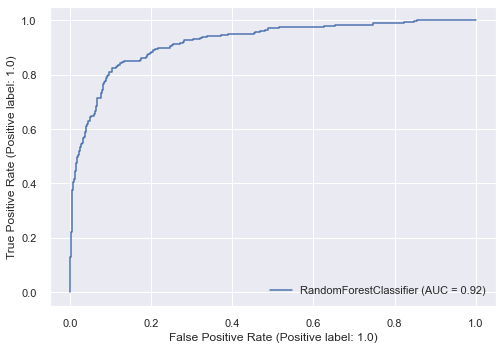

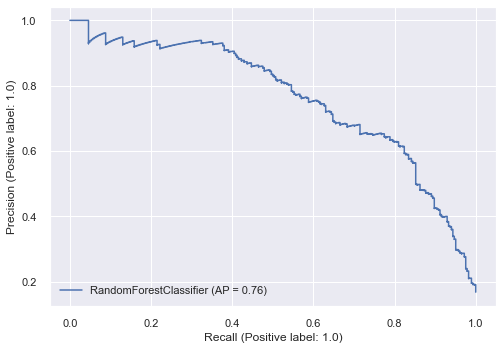

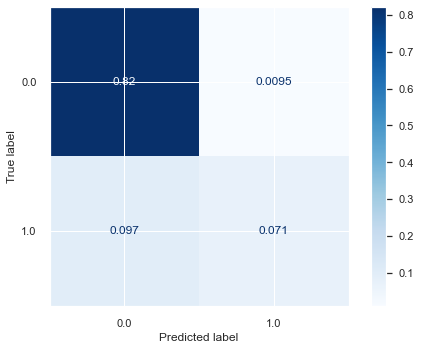

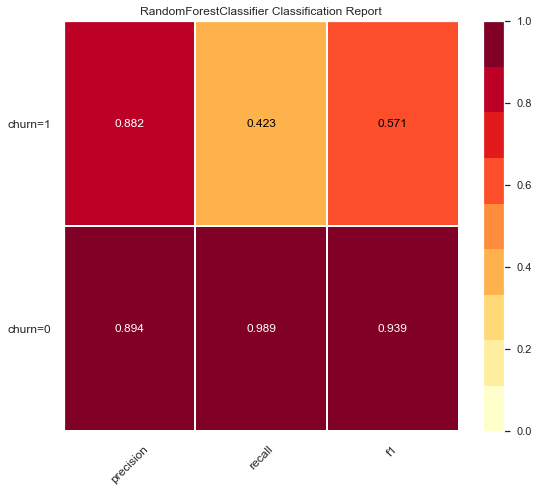

In [874]:
params_rf =study.best_trial.params

model_rf = RandomForestClassifier(**params_rf)
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(model_rf, X_train, y_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

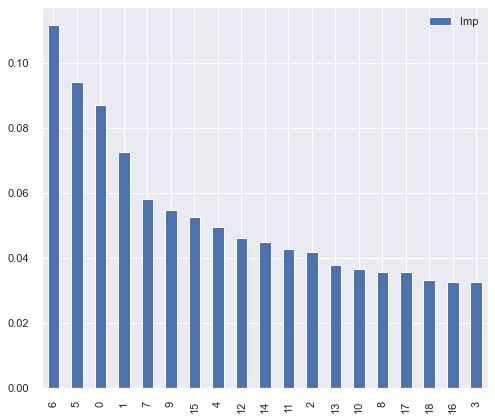

In [875]:
feat_imp=pd.DataFrame(data=model_rf.feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

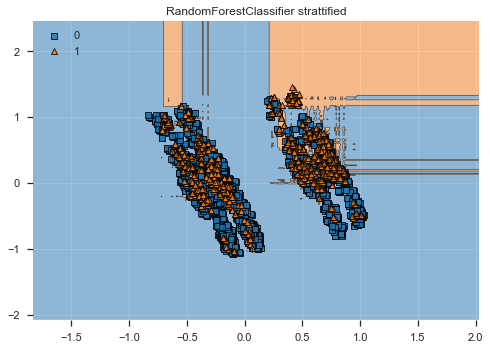

In [876]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier strattified')
plt.show()

In [877]:
#2.Deal with data imbalance using random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)

In [878]:
df_result=find_best_model(X_over_train,y_over_train)

In [879]:
pd.set_option('display.max_colwidth', None)
df_result.sort_values(by='best_score',ascending=False)

model  best_score                               best_params
3            RFC    0.985962                      {'n_estimators': 70}
6        XGBoost    0.962775                    {'learning_rate': 0.1}
1            knn    0.903265                        {'n_neighbors': 5}
2            svc    0.865734                                  {'C': 1}
5           GrBC    0.850474                      {'n_estimators': 80}
0  decision_tree    0.801949  {'max_depth': 7, 'min_samples_split': 5}
7             NN    0.799199                {'hidden_layer_sizes': 10}
4           AdaC    0.784557                      {'n_estimators': 80}

In [880]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_new,y,scoring='f1')
    f1=score.mean()
    return f1

In [881]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-28 22:41:29,309] A new study created in memory with name: no-name-04159c88-7e6c-4e90-8447-7c5dab175586
[I 2023-05-28 22:41:34,810] Trial 0 finished with value: 0.5389809648318924 and parameters: {'n_estimators': 107, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5389809648318924.
[I 2023-05-28 22:41:38,059] Trial 1 finished with value: 0.014594579931096219 and parameters: {'n_estimators': 93, 'criterion': 'log_loss', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5389809648318924.
[I 2023-05-28 22:41:40,917] Trial 2 finished with value: 0.020705799436165927 and parameters: {'n_estimators': 74, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.5389809648318924.
[I 2023-05-28 22:41:46,614] Trial 3 finished with value: 0.5404

In [882]:
study.best_trial.value

0.6166101734508295

In [883]:
study.best_trial.params

{'n_estimators': 99,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2'}

Accuracy = 0.899
FPR = 0.322
FNR = 0.049
Specificity = 0.678
Recall = 0.951
Precision = 0.927
NPV = 0.764
MCC = 0.659
F1_score = 0.719
ROC Area under Curve = 0.845
PR Area under Curve = 0.558
Brier score = 0.092
Time taken = 1.827
              precision    recall  f1-score   support

         0.0    0.95106   0.92669   0.93872      1405
         1.0    0.67812   0.76408   0.71854       284

    accuracy                        0.89935      1689
   macro avg    0.81459   0.84539   0.82863      1689
weighted avg    0.90517   0.89935   0.90170      1689



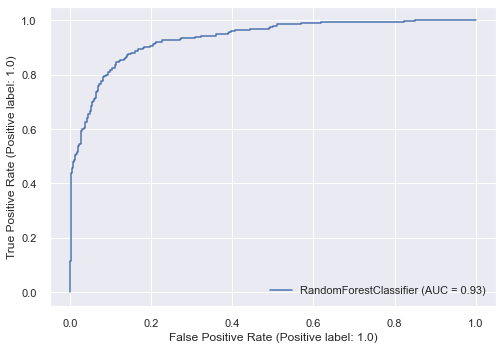

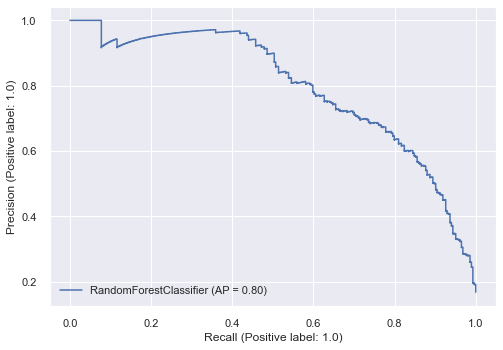

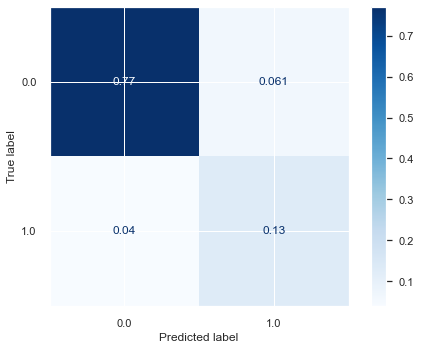

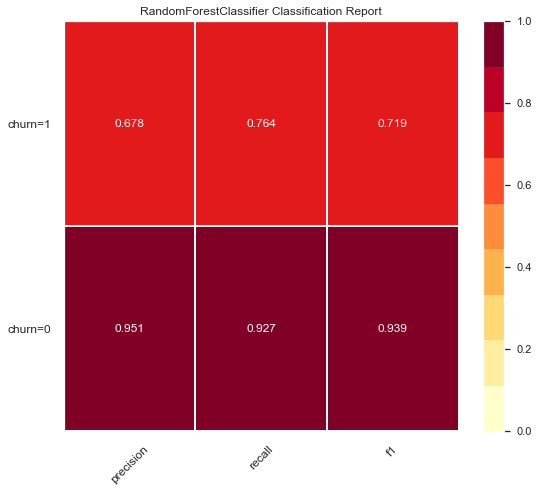

In [884]:
from sklearn.ensemble import RandomForestClassifier

params_rf = study.best_trial.params

model_rf = RandomForestClassifier(**params_rf)
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(model_rf, X_over_train, y_over_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

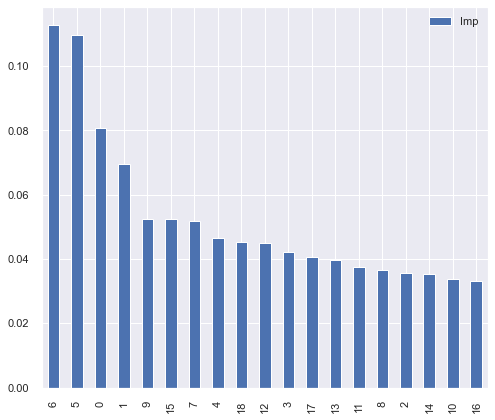

In [885]:
feat_imp=pd.DataFrame(data=model_rf.feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

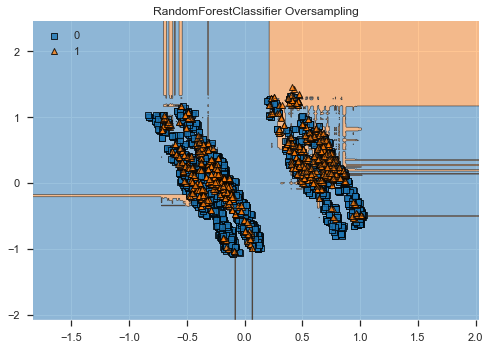

In [886]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier Oversampling')
plt.show()

In [887]:
#Deal with data imalance using Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)

In [888]:
df_result=find_best_model(X_under_train,y_under_train)

In [889]:
pd.set_option('display.max_colwidth', None)
df_result.sort_values(by='best_score',ascending=False)

model  best_score                               best_params
3            RFC    0.819315                      {'n_estimators': 80}
6        XGBoost    0.807935                    {'learning_rate': 0.1}
2            svc    0.761956                                  {'C': 1}
7             NN    0.761284                {'hidden_layer_sizes': 10}
5           GrBC    0.761267                      {'n_estimators': 80}
1            knn    0.729728                        {'n_neighbors': 7}
4           AdaC    0.728167                      {'n_estimators': 80}
0  decision_tree    0.720586  {'max_depth': 7, 'min_samples_split': 5}

In [890]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_new,y,scoring='f1')
    f1=score.mean()
    return f1

In [891]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)

[I 2023-05-28 22:43:56,640] A new study created in memory with name: no-name-477f1bd3-6439-4604-8b3b-c66d87911bdb
[I 2023-05-28 22:44:01,028] Trial 0 finished with value: 0.1053112091986903 and parameters: {'n_estimators': 103, 'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.1053112091986903.
[I 2023-05-28 22:44:04,382] Trial 1 finished with value: 0.10545253992870188 and parameters: {'n_estimators': 86, 'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 1 with value: 0.10545253992870188.
[I 2023-05-28 22:44:06,888] Trial 2 finished with value: 0.010427574171029668 and parameters: {'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.10545253992870188.
[I 2023-05-28 22:44:10,426] Trial 3 finished with value: 0.

[I 2023-05-28 22:46:18,125] Trial 29 finished with value: 0.4392239839484181 and parameters: {'n_estimators': 74, 'criterion': 'log_loss', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 28 with value: 0.6194618592762646.


In [892]:
study.best_trial.value

0.6194618592762646

In [893]:
study.best_trial.params

{'n_estimators': 76,
 'criterion': 'log_loss',
 'max_depth': 10,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'log2'}

Accuracy = 0.798
FPR = 0.554
FNR = 0.038
Specificity = 0.446
Recall = 0.962
Precision = 0.788
NPV = 0.845
MCC = 0.508
F1_score = 0.584
ROC Area under Curve = 0.816
PR Area under Curve = 0.403
Brier score = 0.154
Time taken = 0.39
              precision    recall  f1-score   support

         0.0    0.96177   0.78790   0.86620      1405
         1.0    0.44610   0.84507   0.58394       284

    accuracy                        0.79751      1689
   macro avg    0.70393   0.81649   0.72507      1689
weighted avg    0.87506   0.79751   0.81874      1689



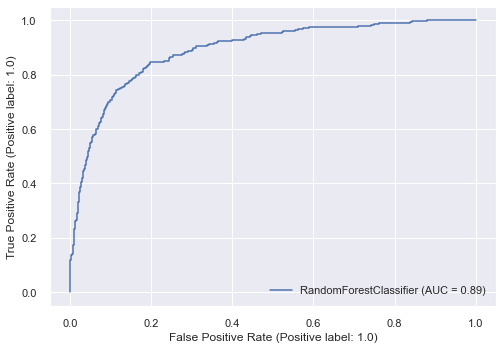

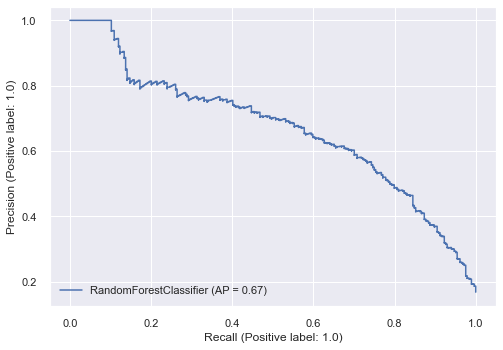

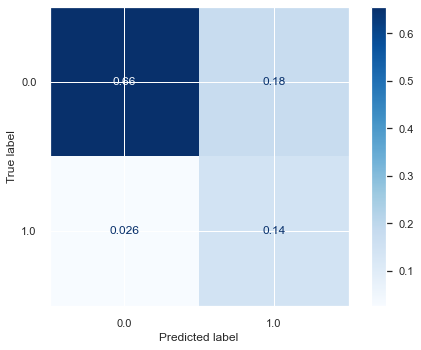

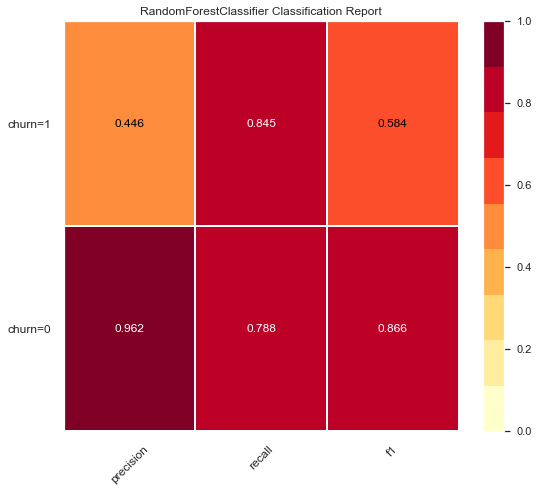

In [894]:
params_rf = study.best_trial.params

model_rf = RandomForestClassifier(**params_rf)
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(model_rf, X_under_train, y_under_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

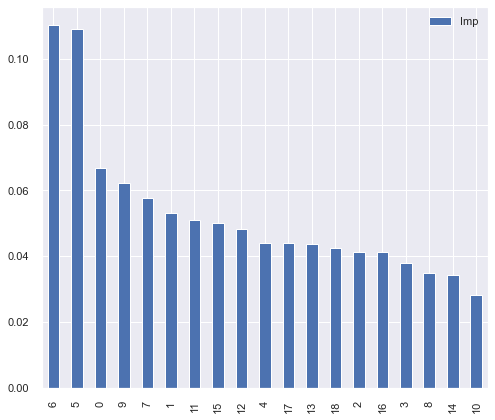

In [895]:
feat_imp=pd.DataFrame(data=model_rf.feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

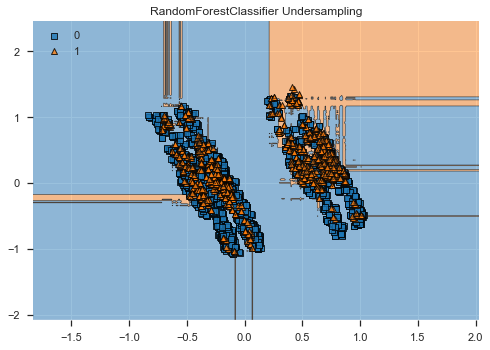

In [896]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier Undersampling')
plt.show()

In [897]:
#SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class.
#SMOTE works by selecting examples that are close in the feature space, 
#drawing a line between the examples in the feature space and drawing a new sample at
#a point along that line.
#upsample with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote_train, y_smote_train = sm.fit_resample(X_train, y_train)

In [898]:
df_result=find_best_model(X_smote_train,y_smote_train)

In [899]:
pd.set_option('display.max_colwidth', None)
df_result.sort_values(by='best_score',ascending=False)

model  best_score                               best_params
3            RFC    0.961400                      {'n_estimators': 70}
6        XGBoost    0.936833                    {'learning_rate': 0.1}
1            knn    0.908609                        {'n_neighbors': 6}
2            svc    0.884492                                  {'C': 1}
5           GrBC    0.843759                      {'n_estimators': 80}
7             NN    0.809580                {'hidden_layer_sizes': 10}
0  decision_tree    0.792950  {'max_depth': 7, 'min_samples_split': 5}
4           AdaC    0.777238                      {'n_estimators': 80}

In [900]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_new,y,scoring='f1')
    f1=score.mean()
    return f1

In [901]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-28 22:50:17,334] A new study created in memory with name: no-name-c0c9b986-416d-4e69-bf6f-9f4895040bea
[I 2023-05-28 22:50:23,016] Trial 0 finished with value: 0.5631759638377197 and parameters: {'n_estimators': 78, 'criterion': 'log_loss', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5631759638377197.
[I 2023-05-28 22:50:27,397] Trial 1 finished with value: 0.3696102367983798 and parameters: {'n_estimators': 76, 'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.5631759638377197.
[I 2023-05-28 22:50:33,481] Trial 2 finished with value: 0.42446831572174054 and parameters: {'n_estimators': 104, 'criterion': 'log_loss', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.5631759638377197.
[I 2023-05-28 22:50:37,515] Trial 3 finished with value: 0.350

In [902]:
study.best_trial.value

0.5631759638377197

In [903]:
study.best_trial.params

{'n_estimators': 78,
 'criterion': 'log_loss',
 'max_depth': 9,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_features': 'sqrt'}

Accuracy = 0.866
FPR = 0.422
FNR = 0.054
Specificity = 0.578
Recall = 0.946
Precision = 0.89
NPV = 0.746
MCC = 0.577
F1_score = 0.651
ROC Area under Curve = 0.818
PR Area under Curve = 0.474
Brier score = 0.116
Time taken = 1.681
              precision    recall  f1-score   support

         0.0    0.94554   0.88968   0.91676      1405
         1.0    0.57766   0.74648   0.65131       284

    accuracy                        0.86560      1689
   macro avg    0.76160   0.81808   0.78403      1689
weighted avg    0.88368   0.86560   0.87212      1689



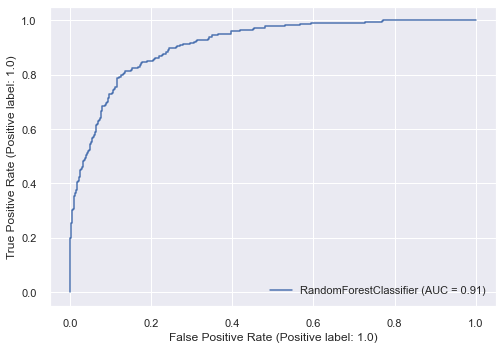

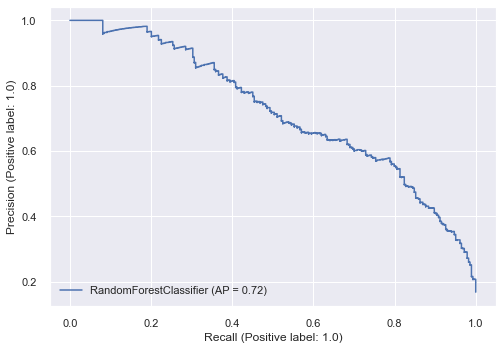

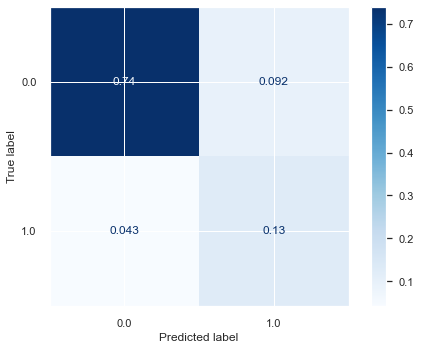

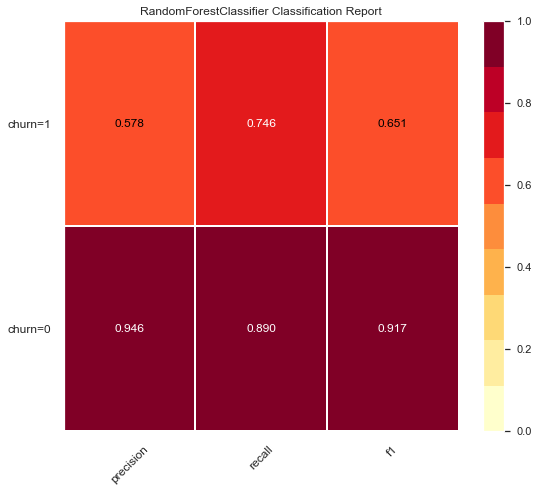

In [904]:
params_rf = study.best_trial.params

model_rf = RandomForestClassifier(**params_rf)
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(model_rf, X_smote_train, y_smote_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

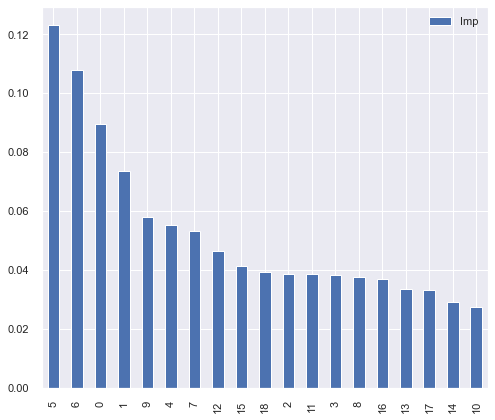

In [905]:
feat_imp=pd.DataFrame(data=model_rf.feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

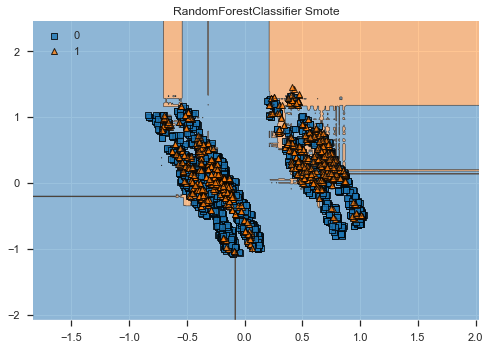

In [906]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier Smote')
plt.show()

In [907]:
#Undersampling using Tomek Links
from imblearn.under_sampling import TomekLinks
tomekU = TomekLinks()
X_underTL_train, y_underTL_train = tomekU.fit_resample(X_train, y_train)

In [908]:
df_result=find_best_model(X_underTL_train,y_underTL_train)

In [909]:
pd.set_option('display.max_colwidth', None)
df_result.sort_values(by='best_score',ascending=False)

model  best_score                               best_params
3            RFC    0.917245                      {'n_estimators': 70}
6        XGBoost    0.905134                    {'learning_rate': 0.1}
5           GrBC    0.873161                      {'n_estimators': 70}
2            svc    0.869809                                  {'C': 1}
0  decision_tree    0.865948  {'max_depth': 7, 'min_samples_split': 5}
7             NN    0.865427                {'hidden_layer_sizes': 10}
1            knn    0.862851                        {'n_neighbors': 5}
4           AdaC    0.852282                      {'n_estimators': 70}

In [910]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_new,y,scoring='f1')
    f1=score.mean()
    return f1

In [911]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-28 22:53:53,768] A new study created in memory with name: no-name-d393479c-a2ba-4b17-9aa2-b053ffc262c4
[I 2023-05-28 22:54:01,131] Trial 0 finished with value: 0.5848868966625862 and parameters: {'n_estimators': 103, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5848868966625862.
[I 2023-05-28 22:54:08,017] Trial 1 finished with value: 0.5333250615920079 and parameters: {'n_estimators': 104, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5848868966625862.
[I 2023-05-28 22:54:10,866] Trial 2 finished with value: 0.38013697455144435 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5848868966625862.
[I 2023-05-28 22:54:13,365] Trial 3 finished with value: 0.24487350

In [912]:
study.best_trial.value

0.6198530030618316

In [913]:
study.best_trial.params

{'n_estimators': 105,
 'criterion': 'log_loss',
 'max_depth': 10,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'sqrt'}

Accuracy = 0.894
FPR = 0.166
FNR = 0.1
Specificity = 0.834
Recall = 0.9
Precision = 0.981
NPV = 0.461
MCC = 0.57
F1_score = 0.594
ROC Area under Curve = 0.721
PR Area under Curve = 0.475
Brier score = 0.078
Time taken = 1.475
              precision    recall  f1-score   support

         0.0    0.90013   0.98149   0.93905      1405
         1.0    0.83439   0.46127   0.59410       284

    accuracy                        0.89402      1689
   macro avg    0.86726   0.72138   0.76658      1689
weighted avg    0.88908   0.89402   0.88105      1689



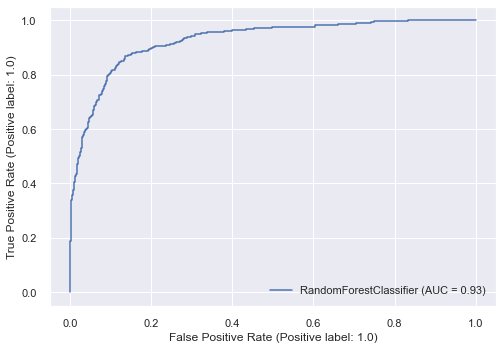

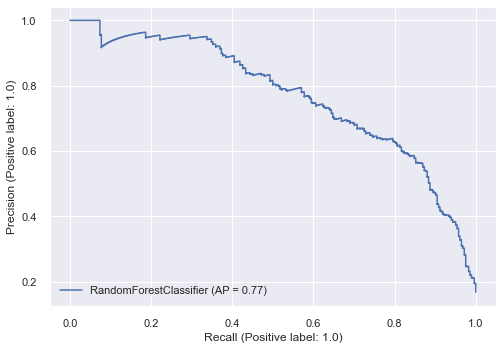

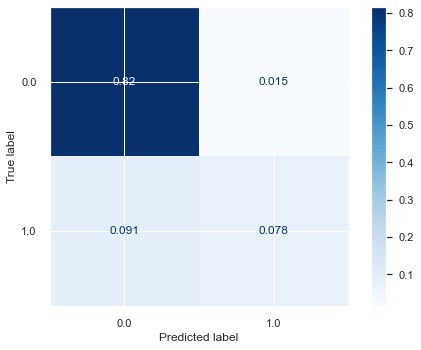

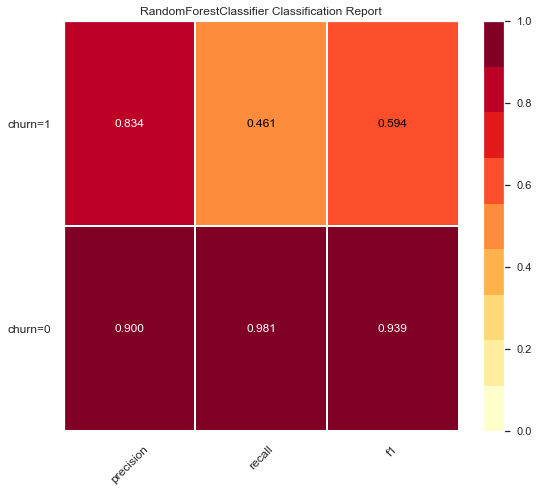

In [914]:
params_rf = study.best_trial.params

model_rf = RandomForestClassifier(**params_rf)
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(model_rf, X_underTL_train, y_underTL_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

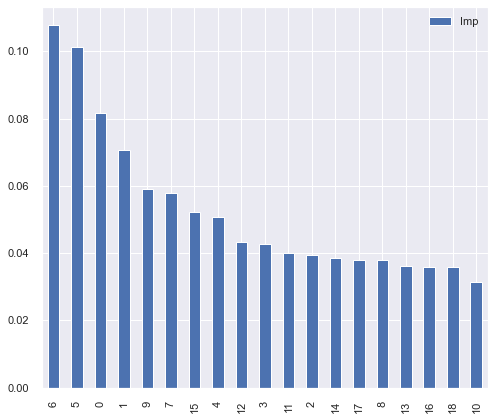

In [915]:
feat_imp=pd.DataFrame(data=model_rf.feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

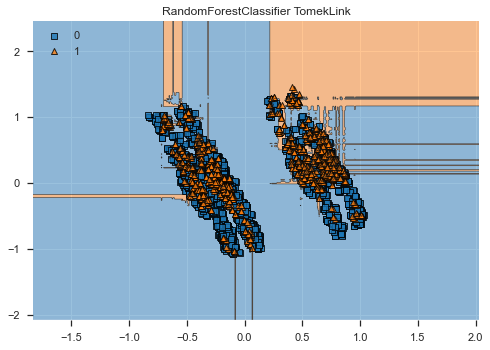

In [916]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier TomekLink')
plt.show()

In [917]:
#Combining SMOTE and Tomek Links
from imblearn.combine import SMOTETomek
sm_tomek=SMOTETomek()
X_smTL_train, y_smTL_train = sm_tomek.fit_resample(X_train, y_train)

In [918]:
df_result=find_best_model(X_smTL_train,y_smTL_train)

In [919]:
pd.set_option('display.max_colwidth', None)
df_result

model  best_score                               best_params
0  decision_tree    0.797737  {'max_depth': 7, 'min_samples_split': 5}
1            knn    0.907130                        {'n_neighbors': 6}
2            svc    0.888320                                  {'C': 1}
3            RFC    0.960526                      {'n_estimators': 70}
4           AdaC    0.779219                      {'n_estimators': 80}
5           GrBC    0.839358                      {'n_estimators': 80}
6        XGBoost    0.936201                    {'learning_rate': 0.1}
7             NN    0.815331                {'hidden_layer_sizes': 10}

In [920]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_new,y,scoring='f1')
    f1=score.mean()
    return f1

In [921]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-28 22:59:50,065] A new study created in memory with name: no-name-6a4bd4b7-73ab-42c7-b093-112f88115809
[I 2023-05-28 22:59:52,531] Trial 0 finished with value: 0.12394885040174838 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.12394885040174838.
[I 2023-05-28 22:59:55,385] Trial 1 finished with value: 0.02474523705258356 and parameters: {'n_estimators': 79, 'criterion': 'log_loss', 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.12394885040174838.
[I 2023-05-28 22:59:59,381] Trial 2 finished with value: 0.20249897955328194 and parameters: {'n_estimators': 81, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.20249897955328194.
[I 2023-05-28 23:00:02,049] Trial 3 finished with value: 0.1185

In [922]:
study.best_trial.value

0.60376516413909

In [923]:
study.best_trial.params

{'n_estimators': 109,
 'criterion': 'log_loss',
 'max_depth': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2'}

Accuracy = 0.879
FPR = 0.387
FNR = 0.052
Specificity = 0.613
Recall = 0.948
Precision = 0.904
NPV = 0.754
MCC = 0.607
F1_score = 0.676
ROC Area under Curve = 0.829
PR Area under Curve = 0.503
Brier score = 0.106
Time taken = 2.481
              precision    recall  f1-score   support

         0.0    0.94776   0.90391   0.92532      1405
         1.0    0.61318   0.75352   0.67615       284

    accuracy                        0.87863      1689
   macro avg    0.78047   0.82872   0.80073      1689
weighted avg    0.89150   0.87863   0.88342      1689



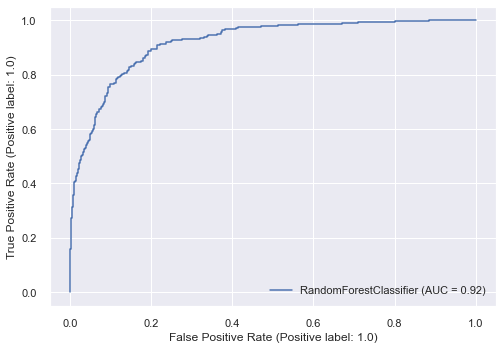

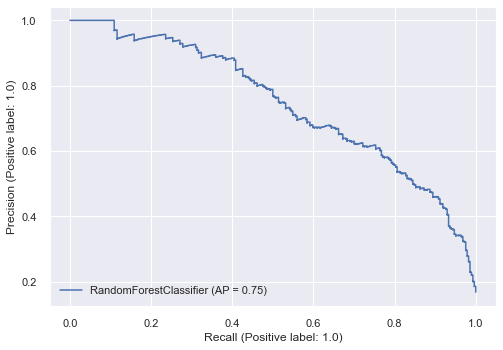

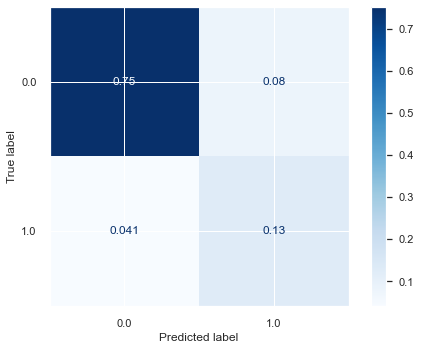

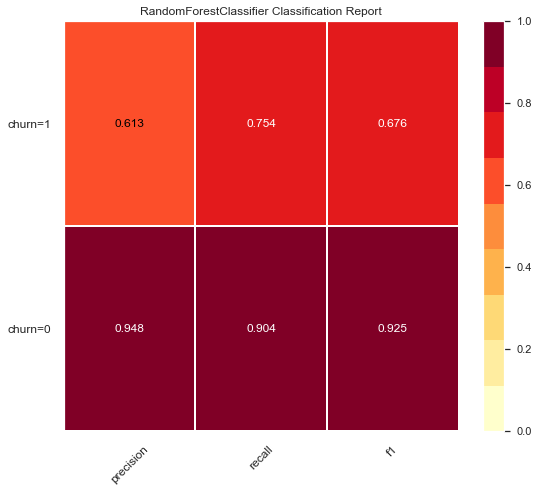

In [924]:
params_rf = study.best_trial.params

model_rf = RandomForestClassifier(**params_rf)
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(model_rf, X_smTL_train, y_smTL_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

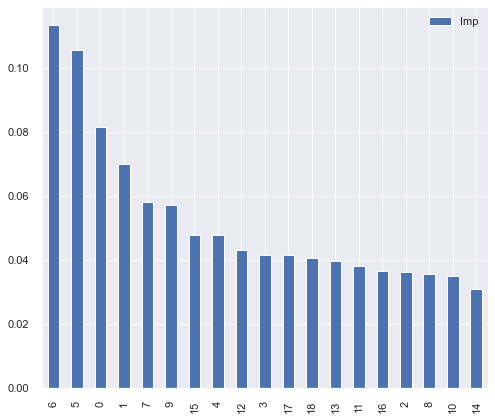

In [925]:
feat_imp=pd.DataFrame(data=model_rf.feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

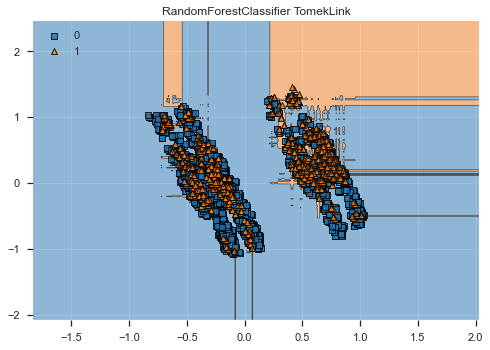

In [926]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier TomekLink')
plt.show()

In [927]:
#Class weights in the models
params_grid_balanced = {'n_estimators': [70,80],
             'criterion': ['entropy','gini'],
             'max_depth': [9,10],
             'min_samples_split': [5,6],
             'min_samples_leaf': [4,5],
             'max_features': ['sqrt','log2'],
             'class_weight': ["balanced"]}


model_rf_balanced = RandomForestClassifier()

grid=GridSearchCV(estimator=model_rf_balanced, param_grid=params_grid_balanced, cv=StratifiedKFold(n_splits=10,shuffle=True))
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'], 'max_depth': [9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [5, 6],
                         'n_estimators': [70, 80]})

In [928]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=70)

Accuracy = 0.891
FPR = 0.329
FNR = 0.063
Specificity = 0.671
Recall = 0.937
Precision = 0.932
NPV = 0.69
MCC = 0.615
F1_score = 0.681
ROC Area under Curve = 0.811
PR Area under Curve = 0.515
Brier score = 0.093
Time taken = 1.026
              precision    recall  f1-score   support

         0.0    0.93701   0.93167   0.93433      1405
         1.0    0.67123   0.69014   0.68056       284

    accuracy                        0.89106      1689
   macro avg    0.80412   0.81091   0.80744      1689
weighted avg    0.89232   0.89106   0.89166      1689



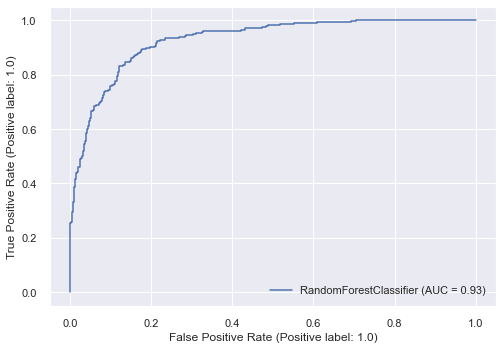

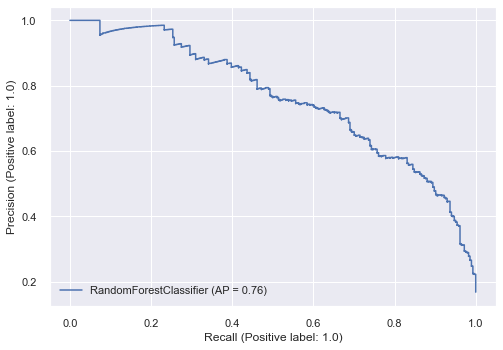

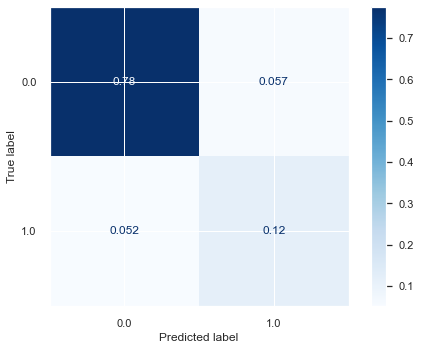

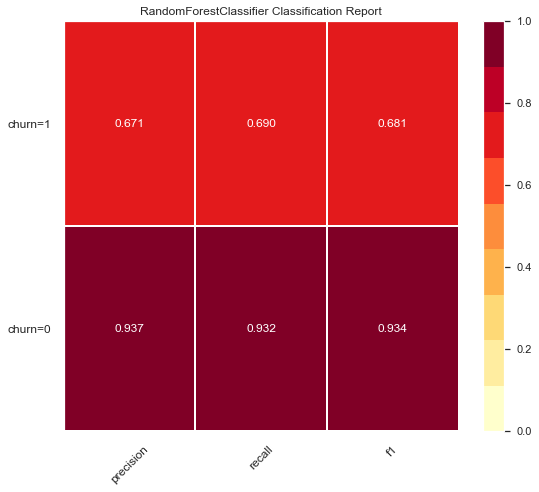

In [929]:
model, accuracy,FPR,FNR,spec,recall,prec,NPV,MCC,f1_sc,roc_auc,pr_auc, brier_score,time_taken= run_model(grid.best_estimator_, X_train, y_train, X_test, y_test)
model_data['accuracy'].append(accuracy)
model_data['fpr'].append(FPR)
model_data['fnr'].append(FNR)
model_data['spec'].append(spec)
model_data['recall'].append(recall)
model_data['prec'].append(prec)
model_data['npv'].append(NPV)
model_data['mcc'].append(MCC)
model_data['f1_score'].append(f1_sc)
model_data['roc_auc'].append(roc_auc)
model_data['pr_auc'].append(pr_auc)
model_data['brier_score'].append(brier_score)
model_data['time_taken'].append(time_taken)

<AxesSubplot:>

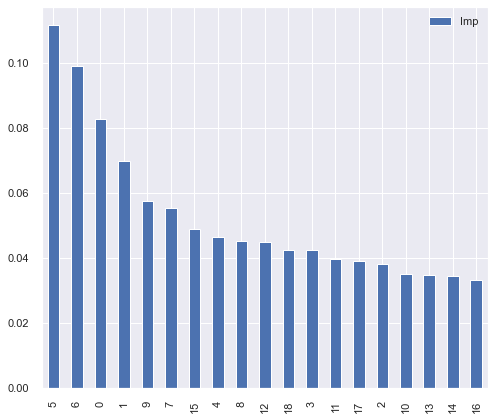

In [930]:
feat_imp=pd.DataFrame(data=grid.best_estimator_.fit(X_train,y_train).feature_importances_, columns=['Imp'])
feat_imp.sort_values(by='Imp',ascending=False).plot(kind='bar',figsize=(8,7),rot=90)

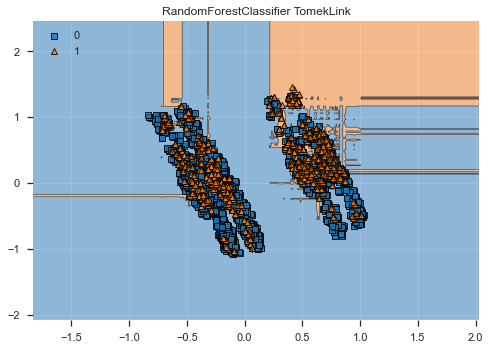

In [931]:
from mlxtend.plotting import plot_decision_regions

X_list = pd.DataFrame(X_new[:,5], X_new[:,6],columns=[1]).reset_index()  #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Churn"]
y = np.asarray(y_list, dtype=np.int32)
forest = RandomForestClassifier()
forest.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=forest,  legend=2)

# Adding axes annotations
plt.xlabel('')
plt.ylabel('')
plt.title('RandomForestClassifier TomekLink')
plt.show()

In [932]:
data=pd.DataFrame(model_data)
model_data

{'type': ['Strattified',
  'Oversampling',
  'Undesampling',
  'Smote',
  'TomekLink',
  'SmoteTomek',
  'Class weights'],
 'accuracy': [0.893, 0.899, 0.798, 0.866, 0.894, 0.879, 0.891],
 'fpr': [0.118, 0.322, 0.554, 0.422, 0.166, 0.387, 0.329],
 'fnr': [0.106, 0.049, 0.038, 0.054, 0.1, 0.052, 0.063],
 'spec': [0.882, 0.678, 0.446, 0.578, 0.834, 0.613, 0.671],
 'recall': [0.894, 0.951, 0.962, 0.946, 0.9, 0.948, 0.937],
 'prec': [0.989, 0.927, 0.788, 0.89, 0.981, 0.904, 0.932],
 'npv': [0.423, 0.764, 0.845, 0.746, 0.461, 0.754, 0.69],
 'mcc': [0.565, 0.659, 0.508, 0.577, 0.57, 0.607, 0.615],
 'f1_score': [0.571, 0.719, 0.584, 0.651, 0.594, 0.676, 0.681],
 'roc_auc': [0.706, 0.845, 0.816, 0.818, 0.721, 0.829, 0.811],
 'pr_auc': [0.47, 0.558, 0.403, 0.474, 0.475, 0.503, 0.515],
 'brier_score': [0.08, 0.092, 0.154, 0.116, 0.078, 0.106, 0.093],
 'time_taken': [0.779, 1.827, 0.39, 1.681, 1.475, 2.481, 1.026]}

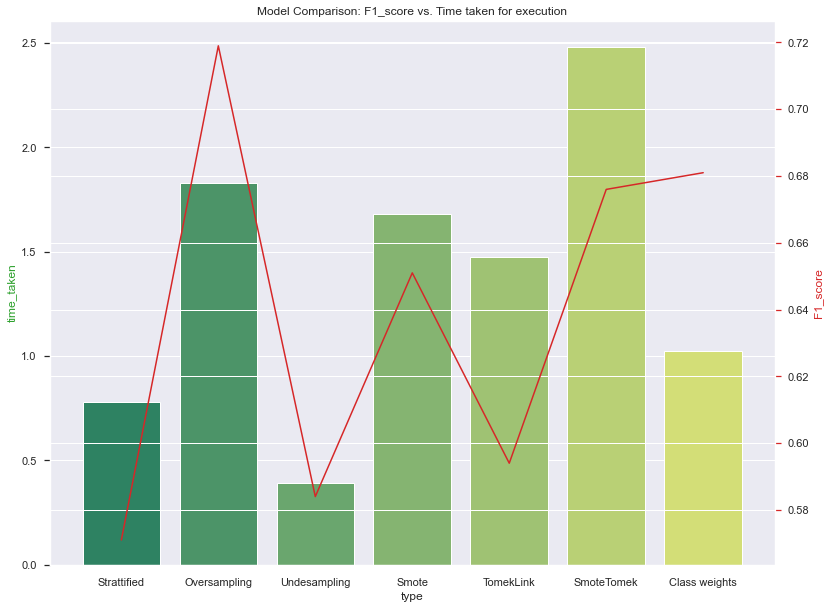

In [933]:
#best model comparisons for all imbalanced data strategies
#best F1 score is obtained by RFC and stratified sampling
#best training time is obtained by RFC and undersampling

fig, ax1 = plt.subplots(figsize=(13,10))
ax1.set_title('Model Comparison: F1_score vs. Time taken for execution')
color = 'tab:green'
ax1.set_xlabel('Model')
ax1.set_ylabel('Time taken', color=color)
ax2 = sns.barplot(x='type', y='time_taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1_score', color=color)
ax2 = sns.lineplot(x='type', y='f1_score', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [934]:
def predict_churn(Tenure, CityTier, WarehouseToHome, HourSpendOnApp,
       NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress,
       Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount,
       DaySinceLastOrder, CashbackAmount,PreferredLoginDevice,
       PreferredPaymentMode, Gender, PreferedOrderCat,MaritalStatus):
    vect=np.array([])
    vect=np.zeros(df_preprocessed.shape[1])
    vect[0]=Tenure
    vect[1]=CityTier
    vect[2]=WarehouseToHome
    vect[3]=HourSpendOnApp
    vect[4]=NumberOfDeviceRegistered
    vect[5]=SatisfactionScore
    vect[6]=NumberOfAddress
    vect[7]=Complain
    vect[8]= OrderAmountHikeFromlastYear
    vect[9]=CouponUsed
    vect[10]=OrderCount
    vect[11]=DaySinceLastOrder
    vect[12]=CashbackAmount
    vect[13]=vect[10]/vect[12]
    
    if PreferredLoginDevice != 'Computer':
        index_PreferredLoginDevice=np.where(df_preprocessed.columns=='PreferredLoginDevice_'+PreferredLoginDevice)[0]
        if len(index_PreferredLoginDevice)>0: 
            vect[index_PreferredLoginDevice[0]]=1
                
    if PreferredPaymentMode!='CC':
        index_PreferredPaymentMode=np.where(df_preprocessed.columns=='PreferredPaymentMode_'+PreferredPaymentMode)[0]
        if len(index_PreferredPaymentMode)>0: 
            vect[index_PreferredPaymentMode[0]]=1
    
    if Gender != 'Female':
        index_Gender=np.where(df_preprocessed.columns=='Gender_'+ Gender)[0]
        if len(index_Gender)>0: 
            vect[index_Gender[0]]=1
    
    if PreferedOrderCat != 'Fashion':
        index_PreferedOrderCat=np.where(df_preprocessed.columns=='PreferedOrderCat_'+PreferedOrderCat)[0]
        if len(index_PreferedOrderCat)>0: 
            vect[index_PreferedOrderCat[0]]=1
    
    if MaritalStatus != 'Divorced':
        index_MaritalStatus=np.where(df_preprocessed.columns=='MaritalStatus_' + MaritalStatus)[0]
        if len(index_MaritalStatus)>0: 
            vect[index_MaritalStatus[0]]=1
    
    return vect.reshape(1, -1)
    

In [935]:
v=predict_churn(1, 2, 3, 4,3, 4, 5,2, 3, 1, 2,4, 143,'Mobile Phone','Debit Card', 'Female', 'Laptop & Accessory','Single')

In [936]:
model_rf.predict(v)

ValueError: X has 30 features, but RandomForestClassifier is expecting 19 features as input.

In [ ]:
import pickle
with open('customer_churn_pickle','wb') as f:
    pickle.dump(model_rf,f)

In [ ]:
import json
columns={
    'data_columns' : [col.lower() for col in df_preprocessed.columns]
}
with open('customer_churn_json','w') as f:
     f.write(json.dumps(columns))